**Puente Viga Losa**

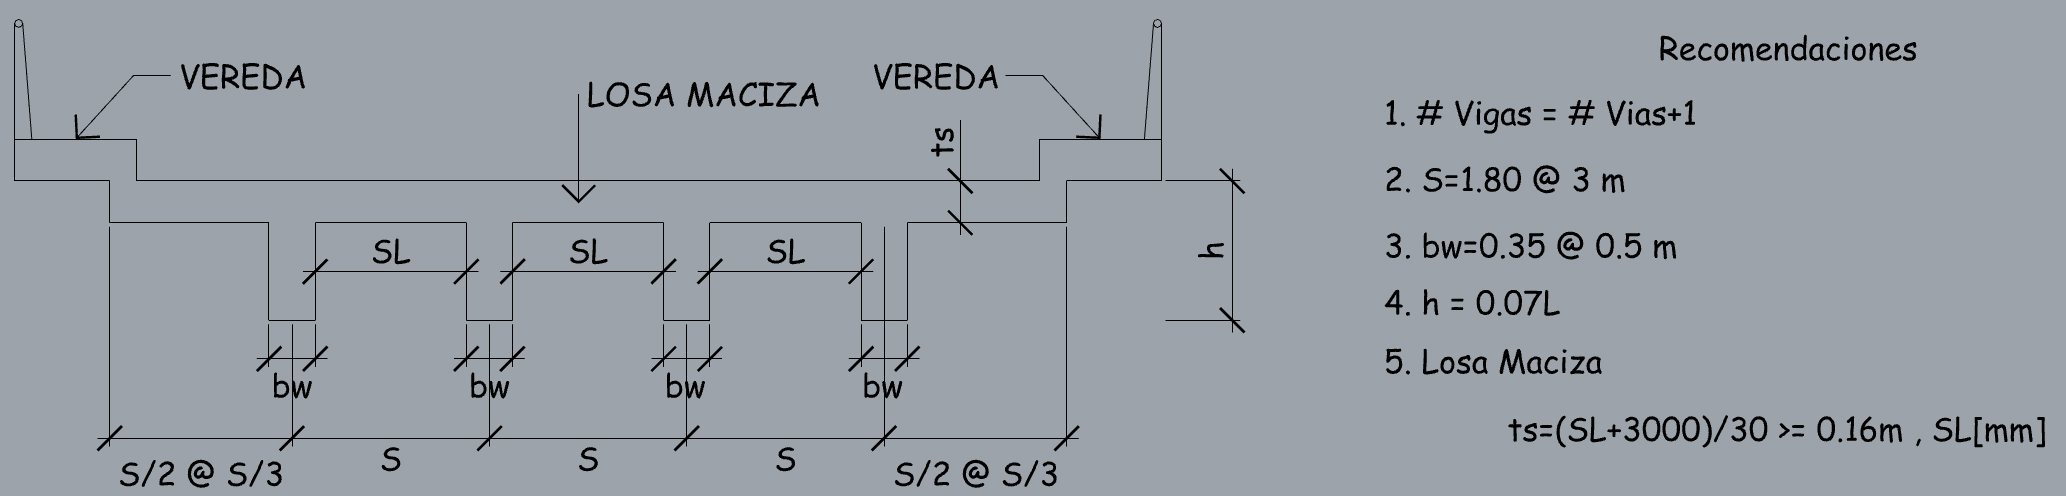

Datos Iniciales:
- Luz del Puente = 28.5 m
- Sobrecargas
  - Trafico de Bicicletas
    - sc_b = 440 kgf/m2
  - Trafico de Peatones
    - sc_p = 367 kgf/m2
- Baranda
  - Peso Propio
    - pb = 160 kgf/m
Propiedades Mecanicas:
- Densidad
  - Concreto = 2.5 tnf/m3
  - Asfalto = 2.2  tnf/m3
- Concreto
  - Resistencia a Compresion
    - fc = 280 kgf/cm2 (Minimo segun Norma)
  - Modulo de Elasticidad
    - E = 15000*$\sqrt{fc}$ kgf/cm2
- Acero
  - Modulo de Elasticidad
    - E = 2000000 kgf/cm2

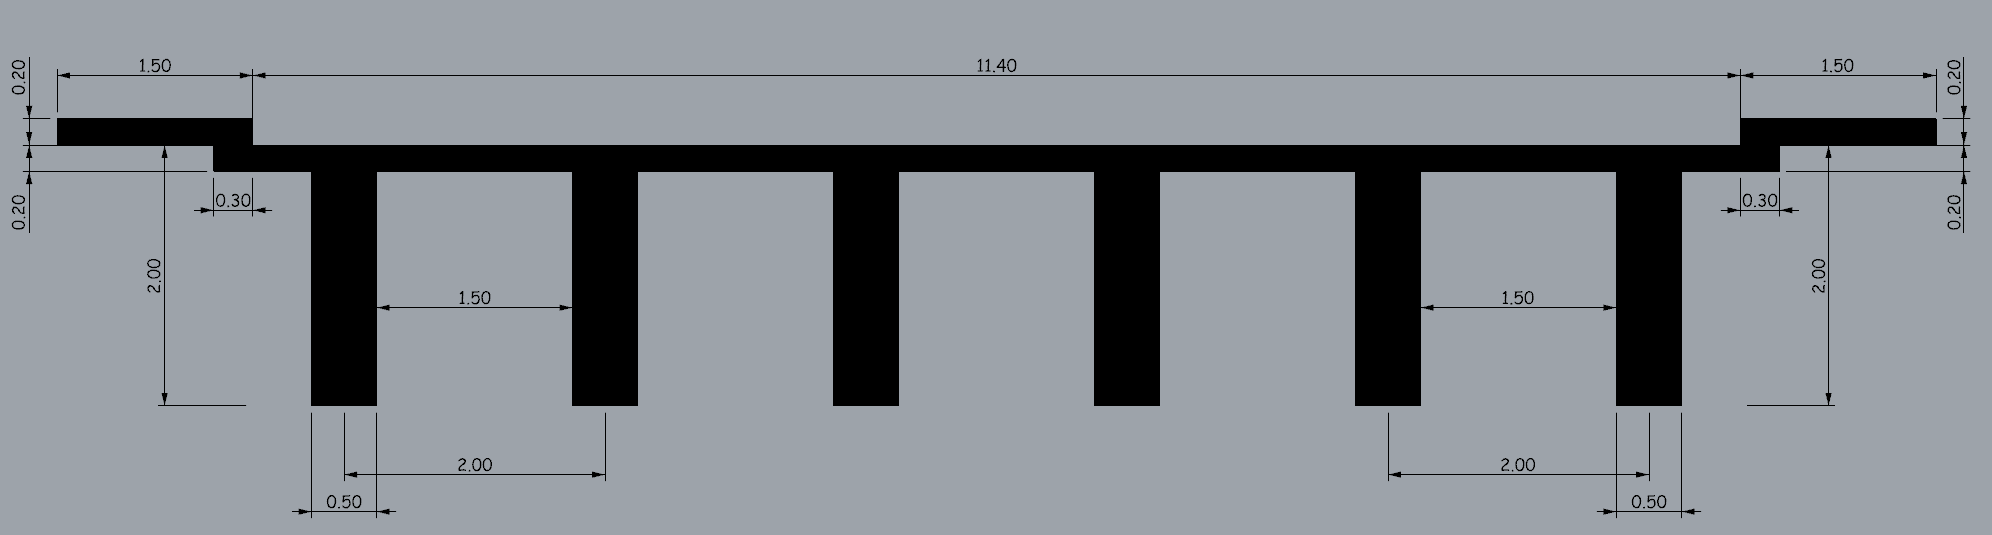

*Ejemplo*

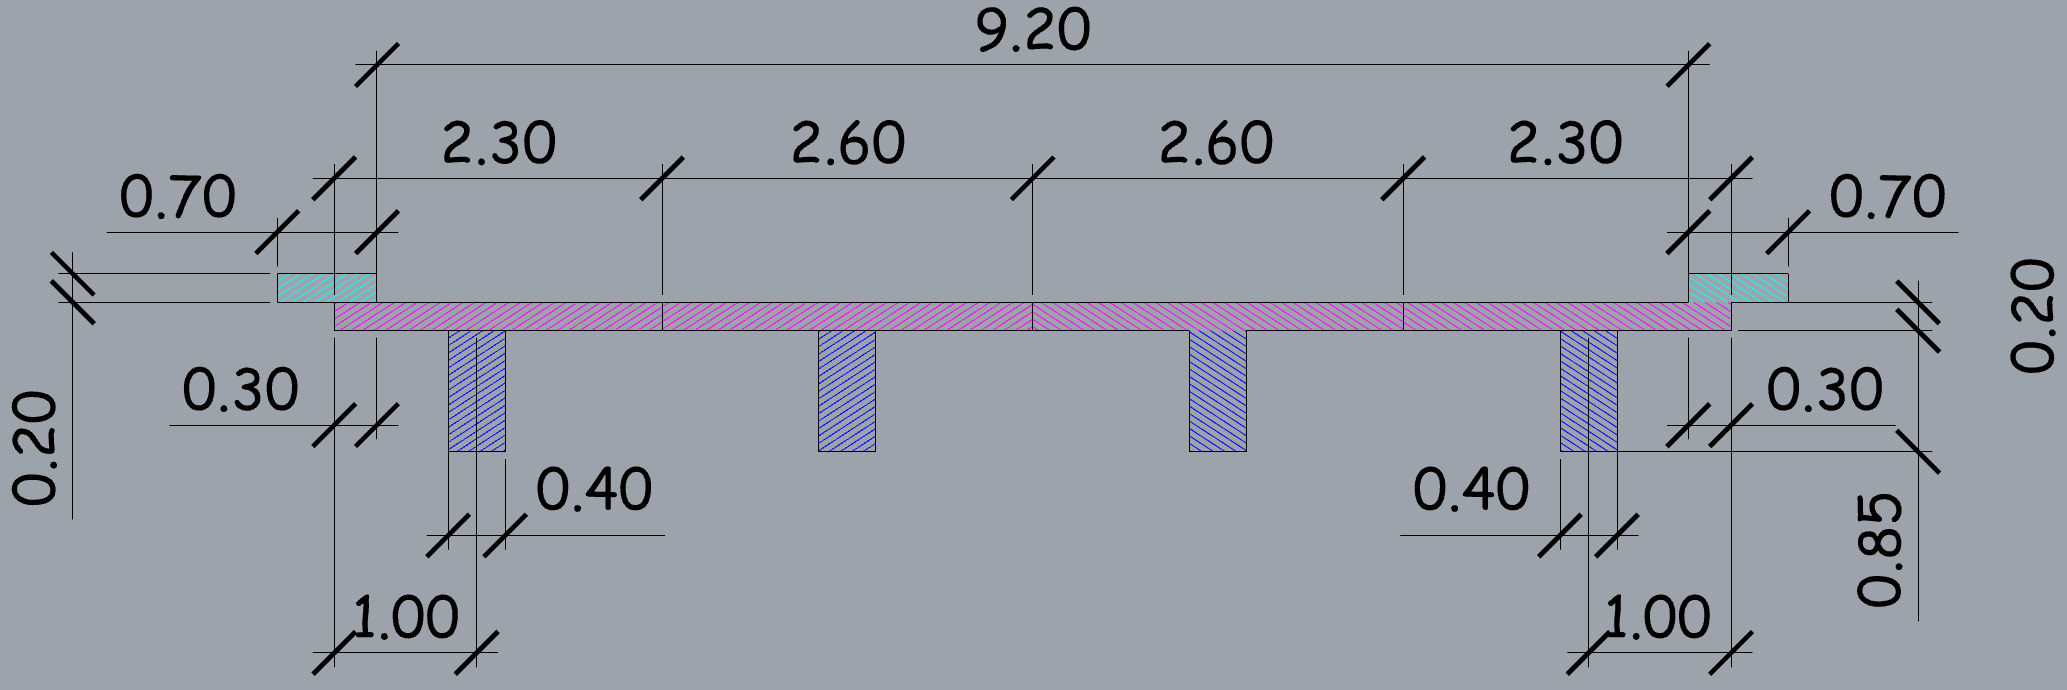

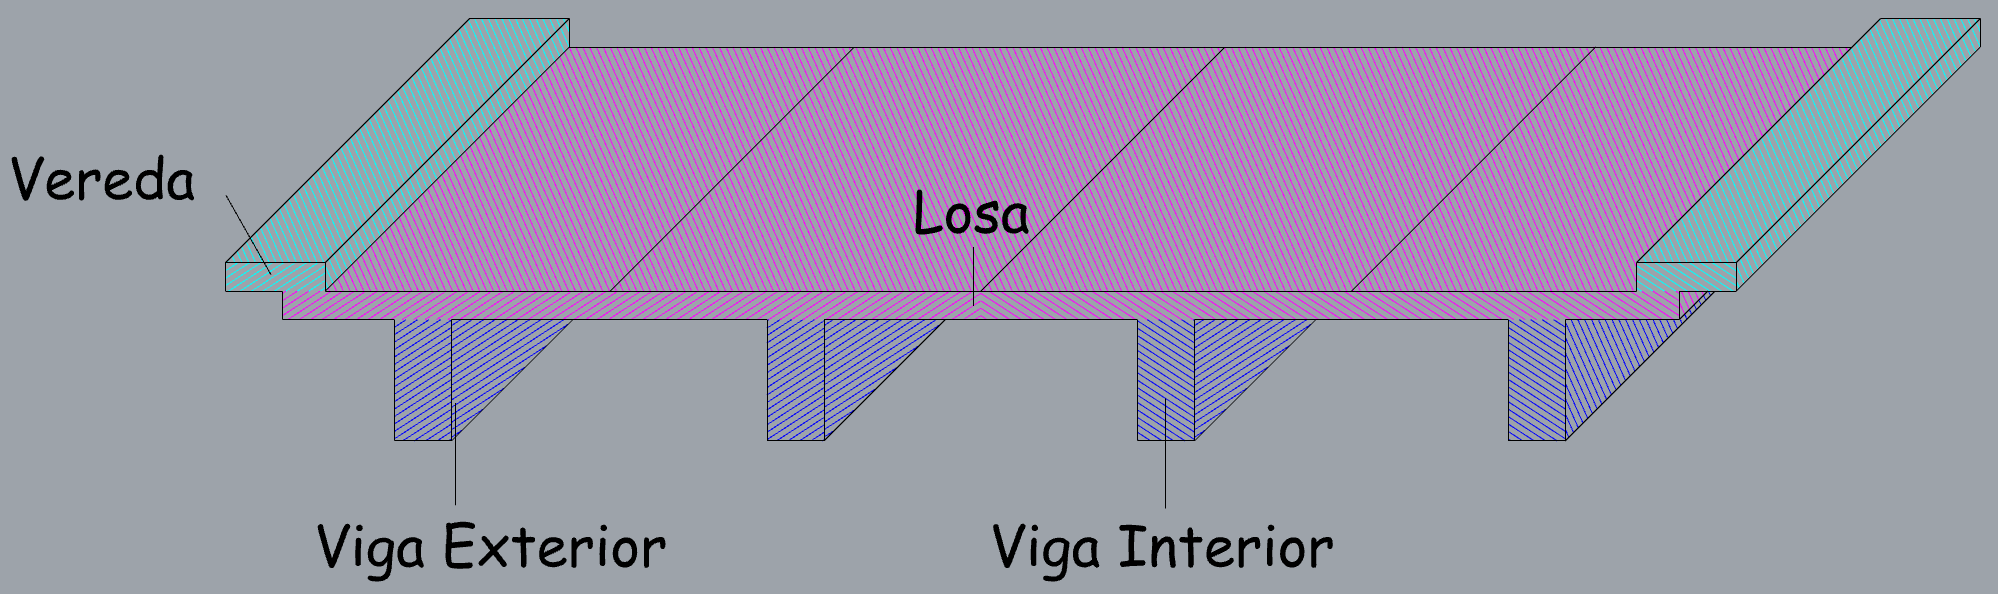

In [1]:
# Propiedades Generales para Diseño Estructural

# Resistencia de los Materiales

# Concreto
fc = 400  # Resistencia del Concreto (kgf/cm2)
Ec = 15000*(fc)**0.5  # Modulo de Elasticidad del Concreto (kgf/cm2)
Et = 2*fc**0.5  # Esfuerzo de Traccion (kgf/cm2)

# Acero
fy = 4200  # Resistencia del Acero (kgf/cm2)
Ea = 2*10**6  # Modulo de Elasticidad del Acero (kgf/cm2)

# Densidad de los Materiales
dc = 2.5  # Densidad del Concreto (tn/m3)
dv = 2.4  # Densidad de la Vereda (tn/m3)
da = 2.2  # Densidad del Asfalto (tn/m3)

# Cargas
cb = 0.160  # Baranda (tnf/m)
cp = 0.367  # Peatonal (tnf/m2)

# Consideraciones
E_s = Ec  # Modulo de El. de la Losa (kgf/cm2)
E_b = E_s  # Modulo de El. Viga = Modulo de El. Losa

In [2]:
# Datos Iniciales
lz = 28.5  # Luz del Puente (m)
lv = 1.5 # Longitud de la Vereda (m)
gg=0.3 # Grosor de la Garganta (m)
ev=0.2 # Espesor de la Vereda (m)
bw=0.5 # Ancho de la Viga (m) :: Escoger
s=2 # Separacion de las Vigas (m) :: Escoger
vld=1 # Volado (m) :: Escoger Max = s/2

In [3]:
h = 0.07*lz  # (m)
sl = s-bw  # (m)
ts = sl/30+1/10  # (m)
print ('h='+str(round(h, 2))+'m')
print ('sl='+str(round(sl, 2))+'m')
print ('ts='+str(round(ts, 2))+'m')
print('Escoger un espesor ts ...')

h=2.0m
sl=1.5m
ts=0.15m
Escoger un espesor ts ...


In [4]:
# Escoger un ts y h
ts=0.20 # (m)
h=2 # (m)

---

**Calculo del Ancho Efectivo en Vigas**

*Viga Interior*

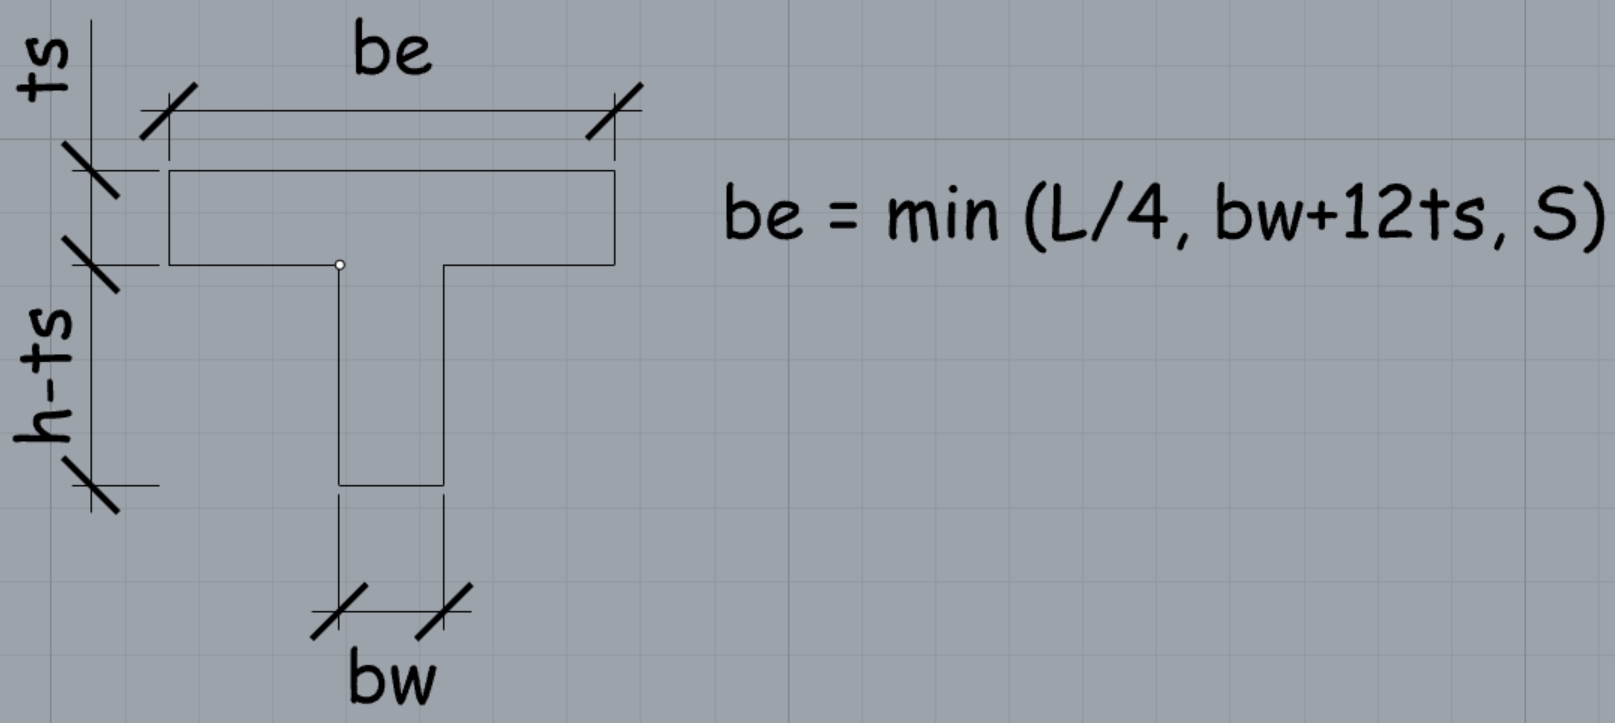

In [5]:
be_i=min(lz/4,bw+12*ts,s)
print ('be_i='+str(round(be_i, 2))+'m')

be_i=2m


*Viga Exterior*

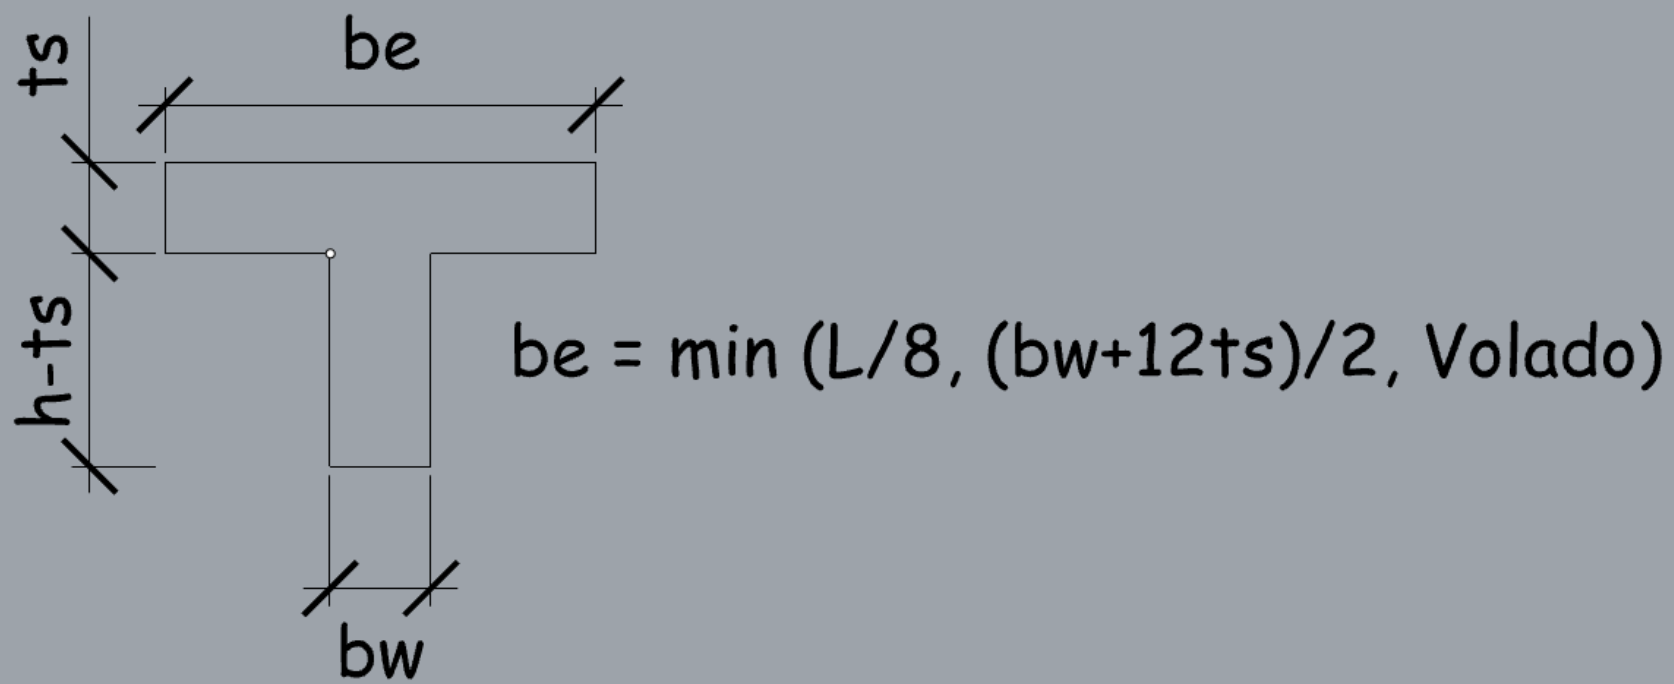

In [6]:
be_e = be_i/2+min(lz/8, (bw+12*ts)/2,vld)
print('be_e='+str(round(be_e, 2))+'m')

be_e=2.0m


*Calculando el __numero de vigas__*

In [7]:
# Recomendacion # Vigas = # Vias + 1
nb_e = 2  # Numero de Vigas Exteriores :: Siempre igual a 2
nb_i = 4  # Numero de Vigas Interiores
anch_f = nb_e*be_e+nb_i*be_i-2*gg-2*(0.375+0.6)  # Ancho de la Via Final (m) 0.375 corresponde a la Barrera y 0.6 a la distancia de la via a la barrera
anch_o = s*(nb_i+1)+nb_e*vld-2*gg-2*(0.375+0.6) # Ancho de la Via Inicial (m)
if anch_f==anch_o:
    anch_o=anch_f
    print ('anch_o = anch_f'+' :: '+str(round(anch_o, 2))+'m'+' = '+str(round(anch_f, 2))+'m')
else:
    print ('anch_o='+str(round(anch_o, 2))+'m')
    print ('anch_f='+str(round(anch_f, 2))+'m')

anch_o = anch_f :: 9.45m = 9.45m


---

**ANALISIS ESTRUCTURAL**

*Camino de Diseño, Tandem, Carga Distribuida*

Obs. *Los momentos y cortantes que se calcularan son por VIA*

**Camion de Diseño**

In [8]:
from sympy import *
r1, r2, m = symbols('r1 r2 m')
r2 = (14.8*(lz-4.3)+3.6*(lz/2+4.3))/lz
r1 = solve(Eq(r1+r2, 14.8*2+3.6), r1)
r1 = r1[0]

m = solve(Eq(-r1*lz/2+m+14.8*4.3, 0), m)
m_c = m[0]

# Momento Maximo
print('Momento Maximo (tnf-m) =', round(m_c, 2))

r1, r2, m = symbols('r1 r2 m')
r2 = (14.8*4.3+3.6*8.6)/lz
r1 = solve(Eq(r1+r2, 14.8*2+3.6), r1)
r1_c = r1[0]

# Cortante Maximo
print('Cortante Maximo (tnf) =', round(r1_c, 2))

Momento Maximo (tnf-m) = 196.99
Cortante Maximo (tnf) = 29.88


**Tandem**

In [9]:
r1, r2, m = symbols('r1 r2 m')
r2 = (11.4*lz/2+11.4*(lz/2+1.2))/lz
r1 = solve(Eq(r1+r2, 11.4*2), r1)
r1 = r1[0]

m = solve(Eq(-r1*lz/2+m, 0), m)
m_t = m[0]

# Momento Maximo
print('Momento Maximo (tnf-m) =', round(m_t, 2))

r1, r2, m = symbols('r1 r2 m')
r2 = (11.4*1.2)/lz
r1 = solve(Eq(r1+r2, 11.4*2), r1)
r1_t = r1[0]

# Cortante Maximo
print('Cortante Maximo (tnf) =', round(r1_t, 2))

Momento Maximo (tnf-m) = 155.61
Cortante Maximo (tnf) = 22.32


**Carga Distribuida**

In [10]:
cv = 0.96  # Carga Distribuida (tnf-m)
m_cv = cv*lz**2/8
print('Momento Maximo (tnf-m) =', round(m_cv, 2))
r1_cv = cv*lz/2
print('Cortante Maximo (tnf) =', round(r1_cv, 2))

Momento Maximo (tnf-m) = 97.47
Cortante Maximo (tnf) = 13.68


---

**Resumen (Momentos Flectores)**

In [11]:
Data_1=[round(m_c,2),round(m_t,2),round(max(m_c,m_t),2),round(max(m_c,m_t)+m_cv,2),round(max(m_c,m_t)*0.33,2)]
Data_1

[196.99, 155.61, 196.99, 294.46, 65.01]

**Resumen (Cortantes)**

In [12]:
Data_2=[round(r1_c,2),round(r1_t,2),round(max(r1_c,r1_t),2),round(max(r1_c,r1_t)+r1_cv,2),round(max(r1_c,r1_t)*0.33,2)]
Data_2

[29.88, 22.32, 29.88, 43.56, 9.86]

Nota: El orden para la obtencion del *RESUMEN* de los momentos flectores y cortantes es el siguiente:
1. Camion de Diseño
2. Tandem
3. Maxima Carga
4. Maxima Carga + Carga Distribuida (Carga Viva) : LL
5. Carga de Impacto : IM

---

***FACTORES DE DISTRIBUCION***

**Momentos en Vigas Interiores y Exteriores**

*Viga Interior*

In [13]:
print ('s='+str(round(s, 2))+'m')
print ('ts='+str(round(ts, 2))+'m')
print ('lz='+str(round(lz, 2))+'m')

s=2m
ts=0.2m
lz=28.5m


Restricciones (m) :
- $1.1<s<4.9$
- $0.11<ts<0.30$
- $6<lz<73$

In [14]:
# Centro de Gravedad de una Viga T
A1=be_i*ts
A2=bw*(h-ts)
A=A1+A2
cg=((h-ts/2)*A1+((h-ts)/2)*A2)/(sum([A1,A2]))
print ('cg='+str(round(cg, 2))+' m')

# Momento de Inercia de una Viga T
I1=be_i*ts**3/12
I2=bw*(h-ts)**3/12
y1=(h-ts/2-cg)
y2=((h-ts)/2-cg)
I=I1+A1*y1**2+I2+A2*y2**2
print ('I='+str(round(I, 3))+' m4')

cg=1.21 m
I=0.521 m4


In [15]:
n = E_b/E_s
eg = h-ts/2-cg
kg = n*(I+A*eg**2)
g_int_m = 0.075+(s/2.9)**.6*(s/lz)**.2*(kg/(lz*ts**3))**.1
print('g_int_m='+str(round(g_int_m, 3))+' [%]')

g_int_m=0.628 [%]


In [16]:
M_LL_vi = g_int_m*Data_1[3]
M_IM_vi = g_int_m*Data_1[4]
print('M_LL_vi='+str(round(M_LL_vi, 2))+' tnf-m')
print('M_IM_vi='+str(round(M_IM_vi, 2))+' tnf-m')

M_LL_vi=184.83 tnf-m
M_IM_vi=40.81 tnf-m


*Viga Exterior*

In [17]:
de=vld-gg
e=0.77+de/2.8
print ('de='+str(round(de, 2))+' m')
print ('e='+str(round(e, 2))+' m')

de=0.7 m
e=1.02 m


Restriccion del valor *de* (m):
- $0.30<de<1.7$

In [18]:
g_ext_m = g_int_m*e
print('g_ext_m='+str(round(g_ext_m, 3))+' [%]')

g_ext_m=0.64 [%]


In [19]:
M_LL_ve = g_ext_m*Data_1[3]
M_IM_ve = g_ext_m*Data_1[4]
print('M_LL_ve='+str(round(M_LL_ve, 2))+' tnf-m')
print('M_IM_ve='+str(round(M_IM_ve, 2))+' tnf-m')

M_LL_ve=188.52 tnf-m
M_IM_ve=41.62 tnf-m


**Cortantes en Vigas Interiores y Exteriores**

*Viga Interior*

In [20]:
g_int_c = 0.2+s/3.6-(s/10.7)**2
print('g_int_c='+str(round(g_int_c, 3))+' [%]')

g_int_c=0.721 [%]


In [21]:
V_LL_vi = g_int_c*Data_2[3]
V_IM_vi = g_int_c*Data_2[4]
print('V_LL_vi='+str(round(V_LL_vi, 2))+' tnf')
print('V_IM_vi='+str(round(V_IM_vi, 2))+' tnf')

V_LL_vi=31.39 tnf
V_IM_vi=7.10 tnf


*Viga Exterior*

In [22]:
e=0.6+de/3
print ('e='+str(round(e, 2))+' m')

e=0.83 m


In [23]:
g_ext_c = e*g_int_c
print('g_ext_c='+str(round(g_ext_c, 3))+' [%]')

g_ext_c=0.601 [%]


In [24]:
V_LL_ve = g_ext_c*Data_2[3]
V_IM_ve = g_ext_c*Data_2[4]
print('V_LL_ve='+str(round(V_LL_ve, 2))+' tnf')
print('V_IM_ve='+str(round(V_IM_ve, 2))+' tnf')

V_LL_ve=26.16 tnf
V_IM_ve=5.92 tnf


---

***MOMENTOS DC Y DW***

**Momentos DC (Estructural)**

*Viga Interior*

In [25]:
w_s=dc*be_i*ts
w_b=dc*bw*(h-ts)
M_dc_vi=sum([w_s,w_b])*lz**2/8
V_dc_vi=sum([w_s,w_b])*lz/2
print ('M_dc_vi='+str(round(M_dc_vi, 2))+' tnf-m')
print ('V_dc_vi='+str(round(V_dc_vi, 2))+' tnf')

M_dc_vi=329.98 tnf-m
V_dc_vi=46.31 tnf


*Viga Exterior*

In [26]:
w_s=dc*be_e*ts
w_b=dc*bw*(h-ts)
M_dc_ve=sum([w_s,w_b])*lz**2/8
V_dc_ve=sum([w_s,w_b])*lz/2
print ('M_dc_ve='+str(round(M_dc_ve, 2))+' tnf-m')
print ('V_dc_ve='+str(round(V_dc_ve, 2))+' tnf')

M_dc_ve=329.98 tnf-m
V_dc_ve=46.31 tnf


**Momentos DW (No Estructural)**

*Viga Interior*

In [27]:
w_a=da*be_i*0.10 # 10 cm = 0.10 m de Asfalto
M_dw_vi=w_a*lz**2/8
V_dw_vi=w_a*lz/2
print ('M_dw_vi='+str(round(M_dw_vi, 2))+' tnf-m')
print ('V_dw_vi='+str(round(V_dw_vi, 2))+' tnf')

M_dw_vi=44.67 tnf-m
V_dw_vi=6.27 tnf


*Viga Exterior*

In [28]:
w_a = da*(be_e-gg)*0.10  # 10 cm = 0.10 m de Asfalto (tnf-m)
w_v = dv*lv*ev  # Vereda (tnf-m)
w_b = cb  # Baranda (tnf-m)
M_dw_ve = sum([w_a, w_v, w_b])*lz**2/8
V_dw_ve = sum([w_a, w_v, w_b])*lz/2
print('M_dw_ve='+str(round(M_dw_ve, 2))+' tnf-m')
print('V_dw_ve='+str(round(V_dw_ve, 2))+' tnf')

M_dw_ve=127.32 tnf-m
V_dw_ve=17.87 tnf


*Carga Peatonal*

In [29]:
w_p=cp*lv
M_p=w_p*lz**2/8
V_p=w_p*lz/2
print ('M_p='+str(round(M_p, 2))+' tnf-m')
print ('V_p='+str(round(V_p, 2))+' tnf')

M_p=55.89 tnf-m
V_p=7.84 tnf


---

*Resumen de Momentos y Cortantes en Vigas Interiores y Exteriores*

El Resumen tiene el siguiente orden:
- Factor de Momentos
- Factor de Cortantes
- Momentos en Vigas
    - Viva
    - Impacto
- Cortantes en Vigas
    - Viva
    - Impacto
- Momento DC
- Cortante DC
- Momento DW
- Cortante DW
- Momento Peatonal **
- Cortante Peatonal **

** Solo para Vigas Exteriores

*Viga Exterior*

In [30]:
Data_3=[round(g_ext_m,2),round(g_ext_c,2),round(M_LL_ve,2),round(M_IM_ve,2),round(V_LL_ve,2),round(V_IM_ve,2),round(M_dc_ve,2),round(V_dc_ve,2),round(M_dw_ve,2),round(V_dw_ve,2),round(M_p,2),round(V_p,2)]
Data_3

[0.64,
 0.6,
 188.52,
 41.62,
 26.16,
 5.92,
 329.98,
 46.31,
 127.32,
 17.87,
 55.89,
 7.84]

*Viga Interior*

In [31]:
Data_4=[round(g_int_m,2),round(g_int_c,2),round(M_LL_vi,2),round(M_IM_vi,2),round(V_LL_vi,2),round(V_IM_vi,2),round(M_dc_vi,2),round(V_dc_vi,2),round(M_dw_vi,2),round(V_dw_vi,2)]
Data_4

[0.63, 0.72, 184.83, 40.81, 31.39, 7.10, 329.98, 46.31, 44.67, 6.27]

---

**DISEÑO ESTRUCTURAL**

**Flexion**

Cuantia Minima:
- Vigas
  - $\rho_{min} = 0.002$
  - $A_{min} = \rho_{min}*b*d$

*Viga Interior*

In [32]:
phi_f = 0.9  # Factor de Reduccion por Flexion
d = h*100-15  # Peralte Efectivo (cm) 2 Capas = 15 cm

Mu_vi = 1.25*Data_4[6]+1.5*Data_4[8]+1.75*(Data_4[2]+Data_4[3]) # Momento Ultimo (tnf-m)
ku = Mu_vi*10**5/(phi_f*(be_i*100)*d**2)  # Factor ku
m = fy/(0.85*fc)  # Factor m
rho = 1/m*(1-(1-2*m*(ku/fy))**0.5)  # Factor rho
As_vi = rho*(be_i*100)*d  # Area de Acero (cm2)
a = As_vi*fy/(0.85*fc*(be_i*100))  # Valor a (cm)
c = a/0.85  # Valor c (cm)

if c<20:
    print ('Se diseña como Viga Rectangular :: '+str(round(c,2))+' < 20 cm')
else:
    print ('Se diseña como Viga T :: '+str(round(c,2))+' > 20 cm')
    
if c/d < 0.42:
    print('Falla Ductil :: c/d = ' + str(round(c/d, 2))+ ' < 0.42')
else:
    print ('Falla Fragil :: c/d = ' + str(round(c/d,2))+ ' > 0.42')

Se diseña como Viga Rectangular :: 9.28 < 20 cm
Falla Ductil :: c/d = 0.05 < 0.42


In [33]:
# Diseño de Viga :: Parte Superior

rec=7.5 # Recubrimiento (cm)
rho_min = 0.002  # Cuantia Minima de Acero para Vigas
As_min_vi = rho_min*(bw*100)*(h*100-rec)  # Area de Acero Minima (cm2)
print('As_min_vi = '+str(round(As_min_vi, 2))+' cm2 '+'(Superior)')
print ('Escoger un Area de Acero As ...')

As_min_vi = 19.25 cm2 (Superior)
Escoger un Area de Acero As ...


In [34]:
n = 4  # Cantidad de Barras de Acero
diam = 1  # Diametro de la Barra (in)
As_sup_vi = n*pi*(diam*2.54)**2/4  # Area de la Barra (cm2)
print ('Area As (cm2) = '+str(round(As_sup_vi, 2)) + ' cm2 '+':: '+str(n) + '#'+str(diam)+' (Superior)')

Area As (cm2) = 20.27 cm2 :: 4#1 (Superior)


In [35]:
# Calculo de Acero :: Parte Inferior

n = 27 # Cantidad de Barras de Acero
diam = 1  # Diametro de la Barra (in)
As_esc_vi = n*pi*(diam*2.54)**2/4  # Area de la Barra (cm2)
print ('Area As (cm2) = '+str(round(As_vi,2))+ ' cm2 '+' (Requerido)')
print ('Area As (cm2) = '+str(round(As_esc_vi,2))+ ' cm2 '+':: '+str(n)+ '#'+str(diam)+' (Escogido)')

Area As (cm2) = 127.76 cm2  (Requerido)
Area As (cm2) = 136.81 cm2 :: 27#1 (Escogido)


In [36]:
# Acero Adicional

n = 6  # Cantidad de Barras de Acero
diam = 3/4  # Diametro de la Barra (in)
As_ad_vi = pi*(diam*2.54)**2/4  # Area de la Barra (cm2)
print ('Area As (cm2) = '+str(round(n*As_ad_vi,2))+ ' cm2 '+':: '+str(n)+ '#'+str(diam)+' (Adicional)')

Area As (cm2) = 17.10 cm2 :: 6#0.75 (Adicional)


In [37]:
# Area de Acero Total
As_tot_vi = As_sup_vi+As_vi+As_ad_vi
print('Area As (cm2) = '+str(round(As_vi, 2)) + ' cm2 '+' (Requerido)')
print ('Area As (cm2) = '+str(round(As_tot_vi,2))+ ' cm2 '+' (Total)')

Area As (cm2) = 127.76 cm2  (Requerido)
Area As (cm2) = 150.88 cm2  (Total)


**Corte**

In [38]:
phi_c = 0.85 # Factor de Reduccion para Cortante

Vu_vi = 1.25*Data_4[7]+1.5*Data_4[9]+1.75*(Data_4[4]+Data_4[5]) # Cortante Ultimo (tnf)
Vc_vi = 0.53*fc**.5*(bw*100)*d # Cortante Nominal (kgf)
Vs_vi = Vu_vi*1000/phi_c-Vc_vi # Cortante de Estribo Requerido (kgf)

# Acero de Estribo
diam = 3/8  # Diametro de la Barra (in)
A_diam = pi*(diam*2.54)**2/4

n = 2 # Cantidad de Barras de Acero o Ramales
Av_vi = n*A_diam

# Espaciamiento de Estribos
s_vi = Av_vi*fy*d/(Vs_vi)
print ('s_vi = '+str(round(s_vi,2))+ ' cm '+':: '+'Av = '+str(round(Av_vi,2))+' cm2 ' + '(2 Estribos de ' +str(diam)+')')
print ('Escoger un espaciamiento s_vi ...')

s_vi = 18.35 cm :: Av = 1.43 cm2 (2 Estribos de 0.375)
Escoger un espaciamiento s_vi ...


In [39]:
s_vi=17.5 # cm

Especificaciones:

- Usar 2 Estribos $\phi$ 3/8" :: 5 @ 0.175 , 18 @ 0.10 y rsto. @ 0.25

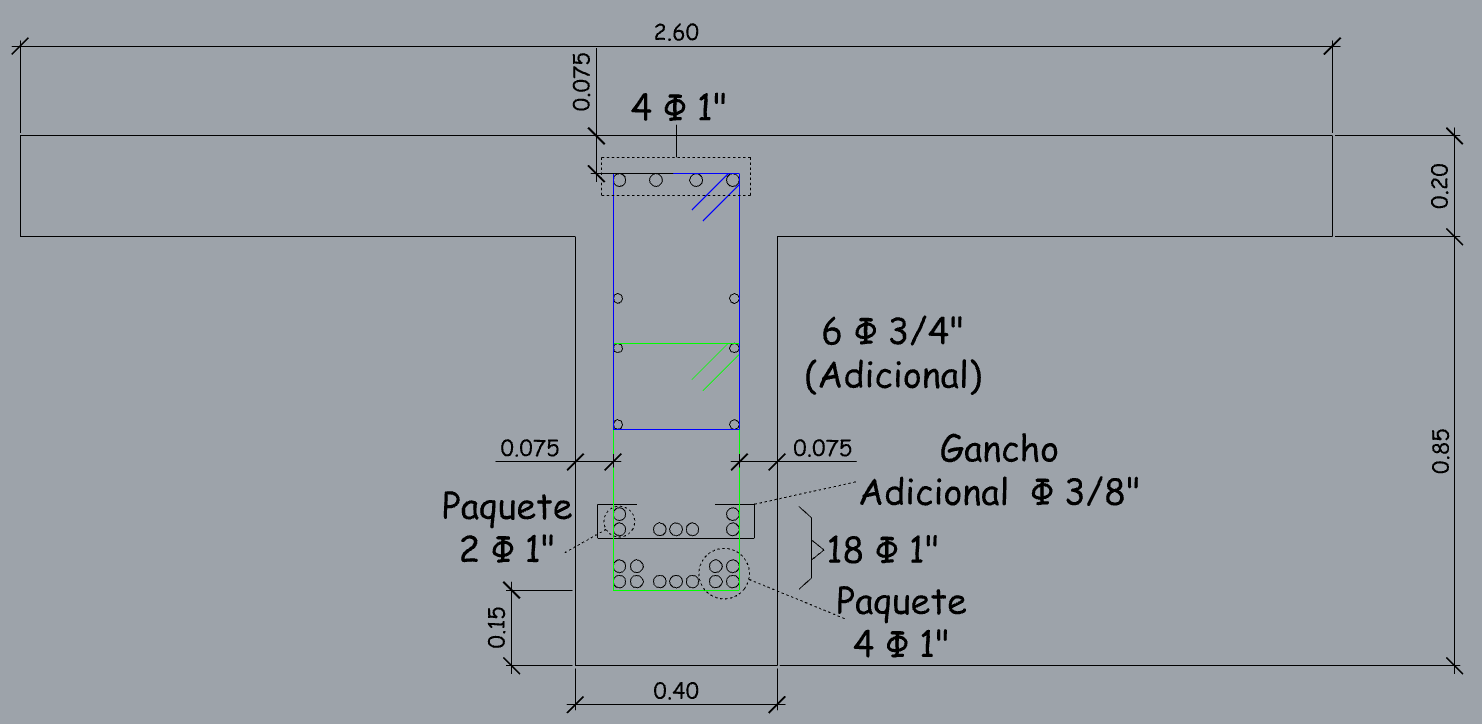

---

**Flexion**

*Viga Exterior*

In [40]:
phi_f = 0.9  # Factor de Reduccion para Flexion
d = h*100-15  # Peralte Efectivo (cm) 2 Capas = 15 cm

Mu_ve = 1.25*Data_3[6]+1.5*Data_3[8]+1.75*(Data_3[2]+Data_3[3]+Data_3[10]) # Momento Ultimo (tnf-m)
ku = Mu_ve*10**5/(phi_f*(be_e*100)*d**2)  # Factor ku
m = fy/(0.85*fc)  # Factor m
rho = 1/m*(1-(1-2*m*(ku/fy))**0.5)  # Factor rho
As_ve = rho*(be_e*100)*d  # Area de Acero (cm2)
a = As_ve*fy/(0.85*fc*(be_e*100))  # Valor a (cm)
c = a/0.85  # Valor c (cm)

if c<20:
    print ('Se diseña como Viga Rectangular :: '+str(round(c,2))+' < 20 cm')
else:
    print ('Se diseña como Viga T :: '+str(round(c,2))+' > 20 cm')
    
if c/d < 0.42:
    print('Falla Ductil :: c/d = ' + str(round(c/d, 2))+ ' < 0.42')
else:
    print ('Falla Fragil :: c/d = ' + str(round(c/d,2))+ ' > 0.42')

Se diseña como Viga Rectangular :: 11.79 < 20 cm
Falla Ductil :: c/d = 0.06 < 0.42


In [41]:
# Diseño de Viga :: Parte Superior

rec = 7.5  # Recubrimiento (cm)
rho_min = 0.002  # Cuantia Minima de Acero para Vigas
As_min_ve = rho_min*(bw*100)*(h*100-rec)  # Area de Acero Minima (cm2)
print('As_min_ve = '+str(round(As_min_ve, 2))+' cm2 '+'(Superior)')
print('Escoger un Area de Acero As ...')

As_min_ve = 19.25 cm2 (Superior)
Escoger un Area de Acero As ...


In [42]:
n = 4  # Cantidad de Barras de Acero
diam = 1  # Diametro de la Barra (in)
As_sup_ve = n*pi*(diam*2.54)**2/4  # Area de la Barra (cm2)
print ('Area As (cm2) = '+str(round(As_sup_ve, 2)) + ' cm2 '+':: '+str(n) + '#'+str(diam)+' (Superior)')

Area As (cm2) = 20.27 cm2 :: 4#1 (Superior)


In [43]:
# Calculo de Acero :: Parte Inferior

n = 33  # Cantidad de Barras de Acero
diam = 1  # Diametro de la Barra (in)
As_esc_ve = n*pi*(diam*2.54)**2/4  # Area de la Barra (cm2)
print('Area As (cm2) = '+str(round(As_ve, 2)) + ' cm2 '+' (Requerido)')
print ('Area As (cm2) = '+str(round(As_esc_ve,2)) + ' cm2 '+':: '+str(n) + '#'+str(diam)+' (Escogido)')

Area As (cm2) = 162.27 cm2  (Requerido)
Area As (cm2) = 167.21 cm2 :: 33#1 (Escogido)


**Corte**

In [44]:
phi_c = 0.85 # Factor de Reduccion para Cortante

Vu_ve = 1.25*Data_3[7]+1.5*Data_3[9]+1.75*(Data_3[4]+Data_3[5]+Data_3[11]) # Cortante Ultimo (tnf)
Vc_ve = 0.53*fc**.5*(bw*100)*d # Cortante Nominal (kgf)
Vs_ve = Vu_ve*1000/phi_c-Vc_ve # Cortante de Estribo Requerido(kgf)

# Acero de Estribo
diam = 3/8  # Diametro de la Barra (in)
A_diam = pi*(diam*2.54)**2/4

n = 2 # Cantidad de Barras de Acero o Ramales
Av_ve = n*A_diam

# Espaciamiento de Estribos
s_ve = Av_ve*fy*d/(Vs_ve)
print ('s_ve = '+str(round(s_ve,2))+ ' cm '+':: '+'Av = '+str(round(Av_ve,2))+' cm2')
print ('Escoger un espaciamiento s_ve ...')

s_ve = 13.22 cm :: Av = 1.43 cm2
Escoger un espaciamiento s_ve ...


In [45]:
s_ve = 12.5 # cm

Especificaciones:

- Usar 2 Estribos $\phi$ 3/8" :: 5 @ 0.125 , 18 @ 0.10 y rsto. @ 0.25

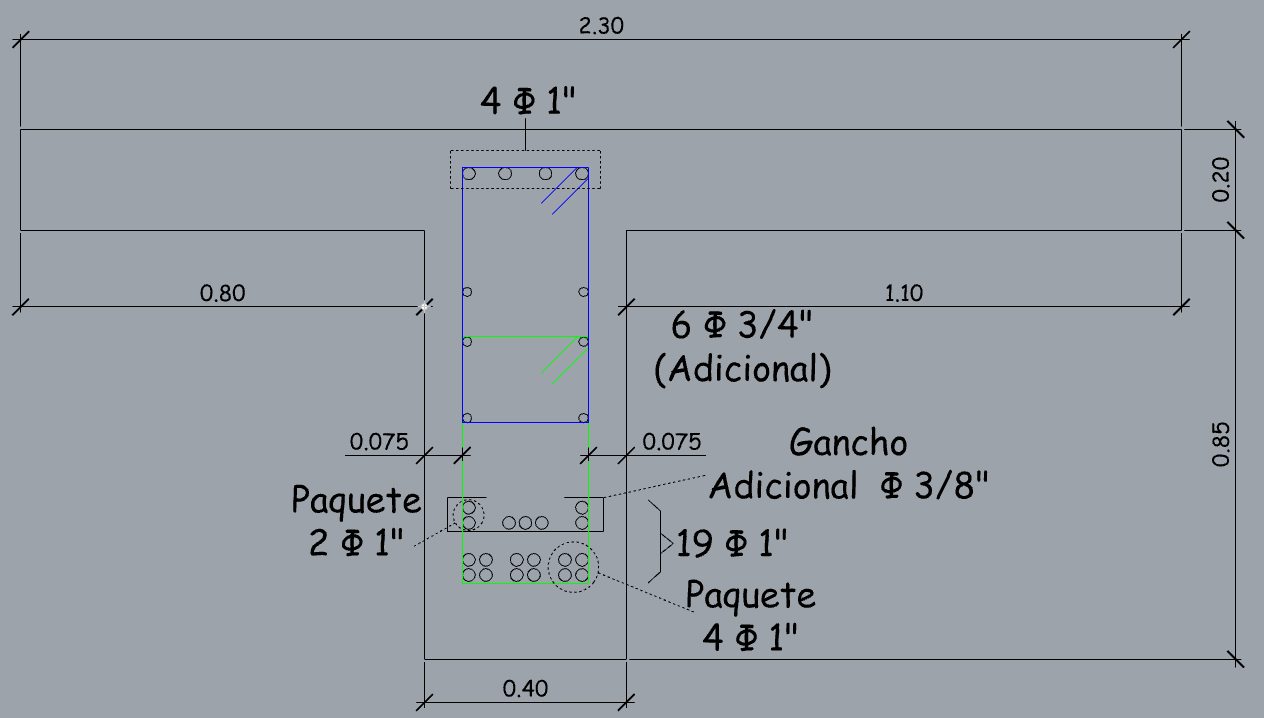

**Nota: El volado se escoge !!**

---

**DISEÑO DE LA LOSA PERPENDICULAR A LAS VIGAS (TRAFICO)**

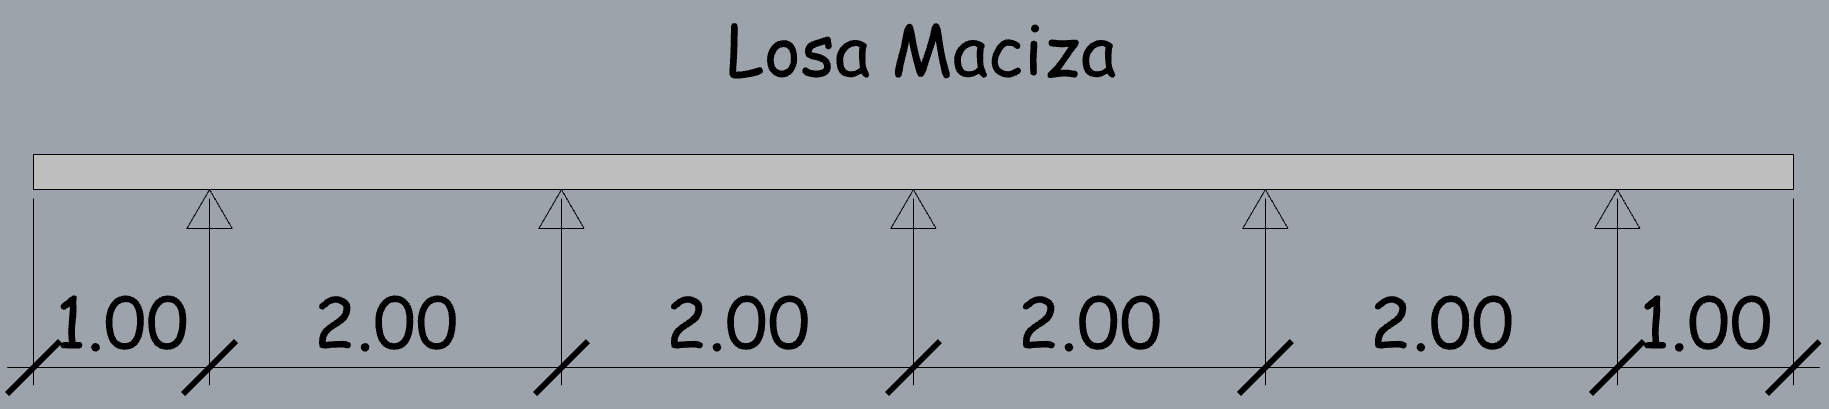

*Carga DC (Carga Estructural)*

In [46]:
w_sl_dc_1=dc*ts*1 # 1m de Ancho de la Losa (slab)
w_sl_dc_2=0.487 # Peso de la Barrera :: Segun literatura (tnf/m) = 0.202875 m² x 1.0m x 2400 kg/m³ = 0.487 tnf/m
print ('w_sl_dc_1='+str(round(w_sl_dc_1, 2))+' tnf/m (Carga Distribuida)')
print ('w_sl_dc_2='+str(round(w_sl_dc_2, 2))+' tnf/m (Barrera de Concreto : Carga Puntual)')

w_sl_dc_1=0.5 tnf/m (Carga Distribuida)
w_sl_dc_2=0.49 tnf/m (Barrera de Concreto : Carga Puntual)


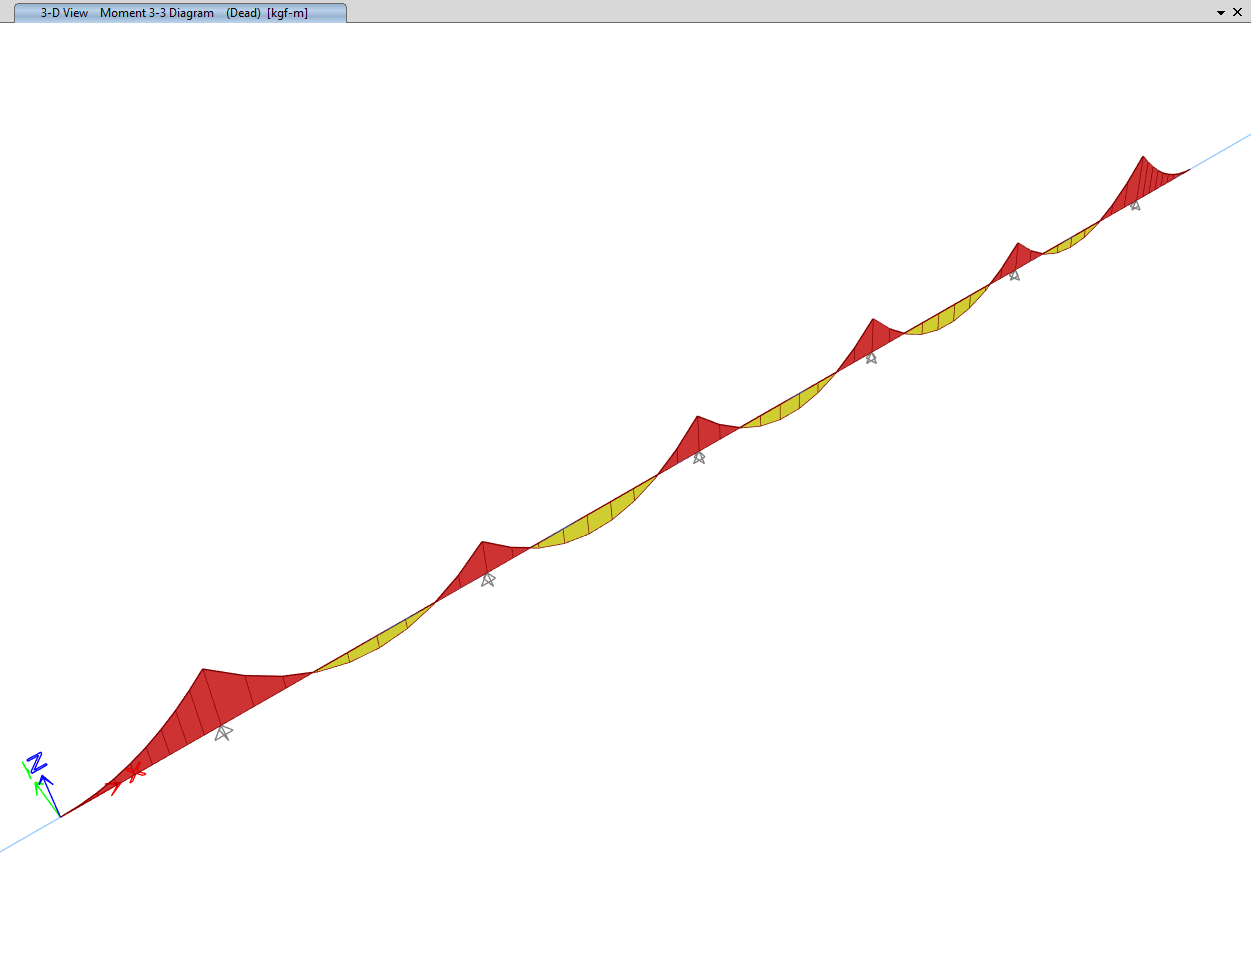

_Nota: Los momentos son determinados usando el __API__ de Etabs_

In [47]:
A_1 = -0.250 # Momento en A (tnf-m)
B_1 = 0.05523 # Momento en B (tnf-m)
C_1 = -0.1453 # Momento en C (tnf-m)
D_1 = 0.09036 # Momento en D (tnf-m)
E_1 = -0.17095  # Momento en E (tnf-m)
F_1 = 0.07596 # Momento en E (tnf-m)

_Carga DW (Carga No Estructural)_

In [48]:
w_sl_as=da*0.1*1 # 10 cm = 0.10 m de Asfalto :: 1m de Ancho de la Losa (tnf/m)
w_sl_v=dv*ev*1 # Vereda :: 1m de Ancho de la Losa (tnf/m) Vereda = 1.5 m
w_sl_b=cb*1 # Baranda :: 1m de Ancho de la Losa (tnf) Baranda
print ('Asfalto = '+str(round(w_sl_as,2))+' tnf/m (Carga Distribuida)')
print ('Vereda = '+str(round(w_sl_v,2))+' tnf/m (Carga Distribuida)')
print ('Baranda = '+str(round(w_sl_b,2))+' tnf (Carga Puntual)')

Asfalto = 0.22 tnf/m (Carga Distribuida)
Vereda = 0.48 tnf/m (Carga Distribuida)
Baranda = 0.16 tnf (Carga Puntual)


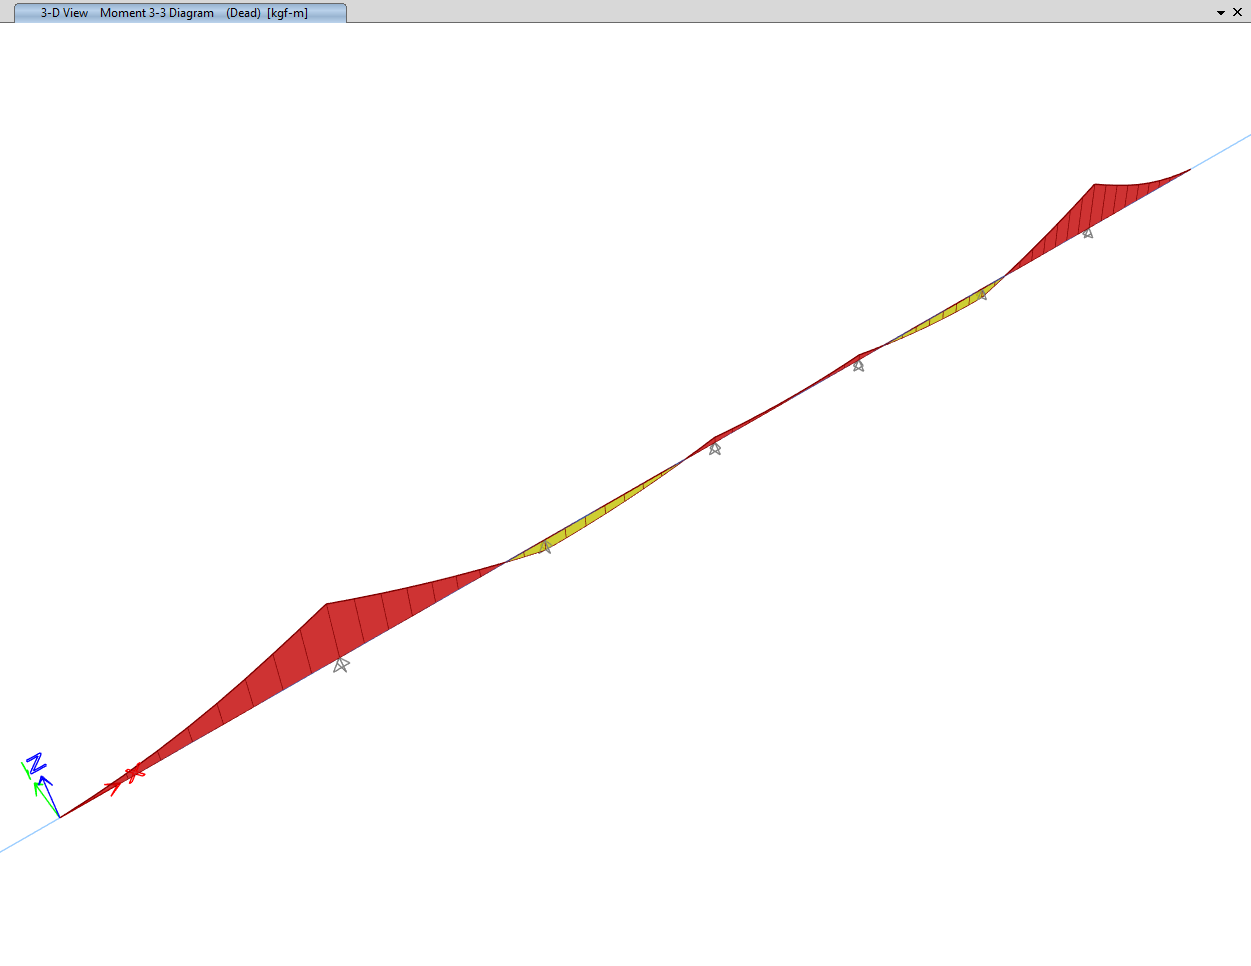

In [49]:
# Momentos solo en los apoyos
A_2 = -1.4499  # Momento  en A (tnf-m)
B_2 = -0.47424 # Momento  en B (tnf-m) :: Momento en la mitad del tramo
C_2 = 0.28413  # Momento  en C (tnf-m)
D_2 = 0.17864 # Momento   en D (tnf-m) :: Momento en la mitad del tramo
E_2 = -0.14413  # Momento en E (tnf-m)
F_2 = -0.03549  # Momento en F (tnf-m)
# Nota: No olvidar colocar los momentos en la mitad de cada tramo.

_Carga Peatonal_

In [50]:
w_sl_p = cp #Carga Peatonal (tnf-m) 1m de Ancho de la Losa
print ('Carga Peatonal = '+str(round(w_sl_p,3))+' tnf/m')

Carga Peatonal = 0.367 tnf/m


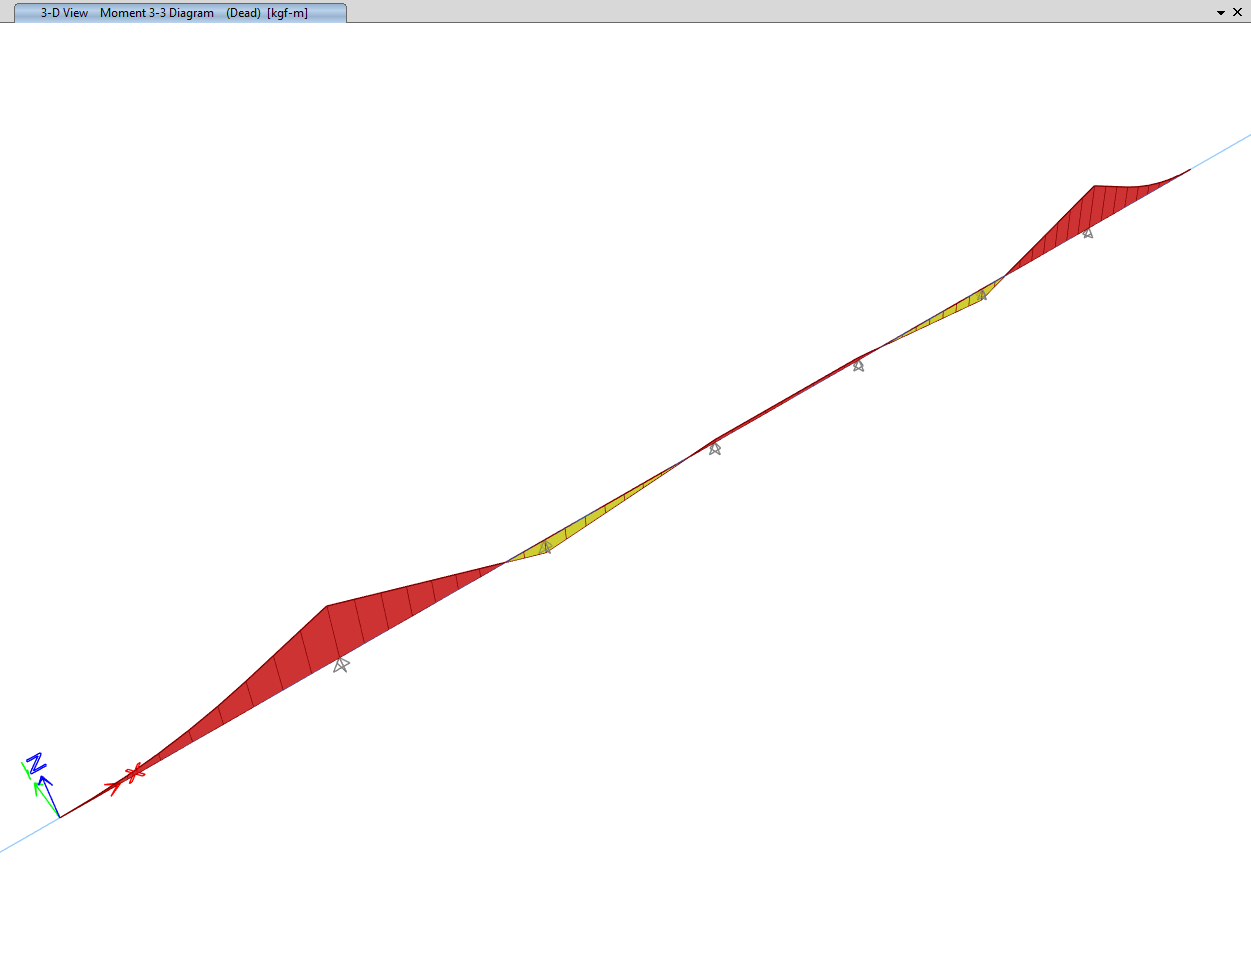

In [51]:
# Todos se encuentran en los apoyos
A_3 =-0.79822  # Momento en A (tnf-m)
B_3 =-0.29547  # Momento en B (tnf-m) :: Mitad del Tramo 1
C_3 =0.20728 # Momento en C (tnf-m)
D_3=0.08311 # Momento en D (tnf-m) :: Mitad del Tramo 2
E_3 =-0.04105  # Momento en E (tnf-m) :: Tambien en la Mitad del Tramo 3 y Apoyo interior 3

_Carga Viva Vehicular_

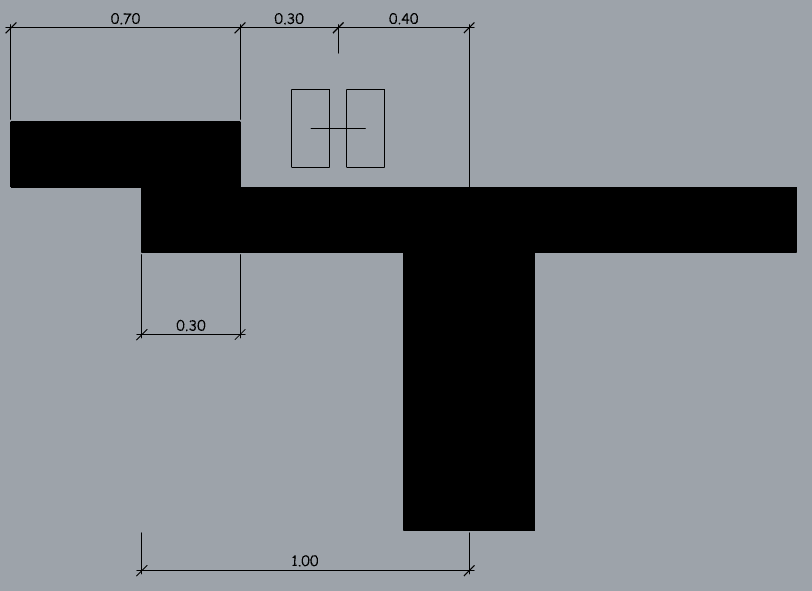

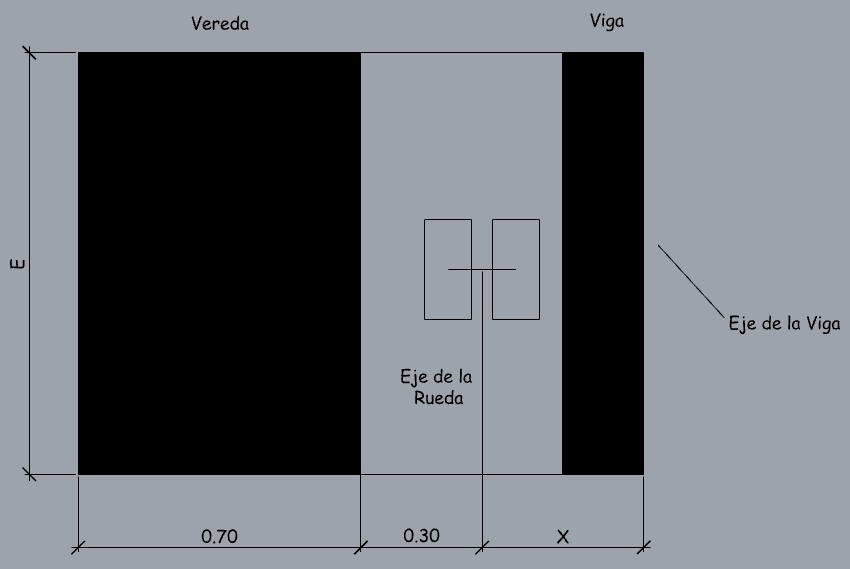

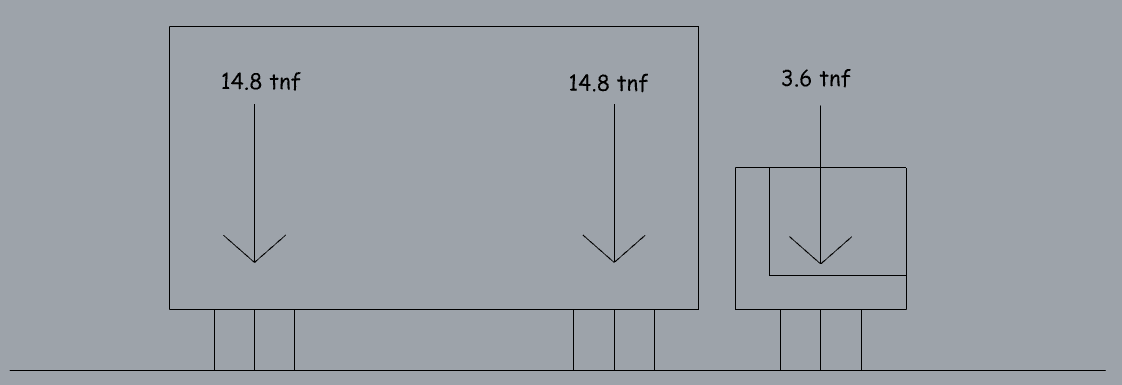

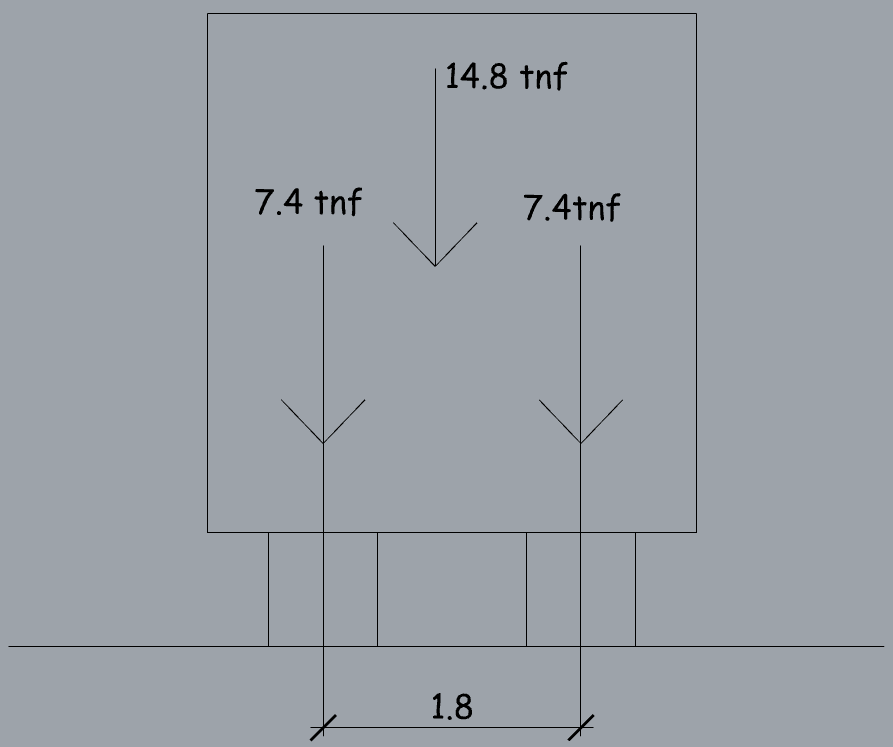

_Momento Exterior_

In [52]:
x = 0.3+0.275  # Distancia del eje de rueda al eje de la viga (m)
E = 1.14+0.833*x
print('E='+str(round(E, 2))+' m')

E=1.62 m


In [53]:
m=1.2 # Factor de Multipresencia ( 2 vehiculos )
P=7.4 # Carga por Rueda (tnf) del Camion de Diseño
M_sl_e_neg_1=-m*P/E*x # Momento Negativo (tnf-m)
print ('M_sl_e_neg_1 = '+str(round(M_sl_e_neg_1,2))+' tnf-m')

M_sl_e_neg_1 = -3.15 tnf-m


_Momento del Apoyo Interior __1___

In [54]:
E = 1.22+0.25*s
print ('E='+str(round(E, 2))+' m')

E=1.72 m


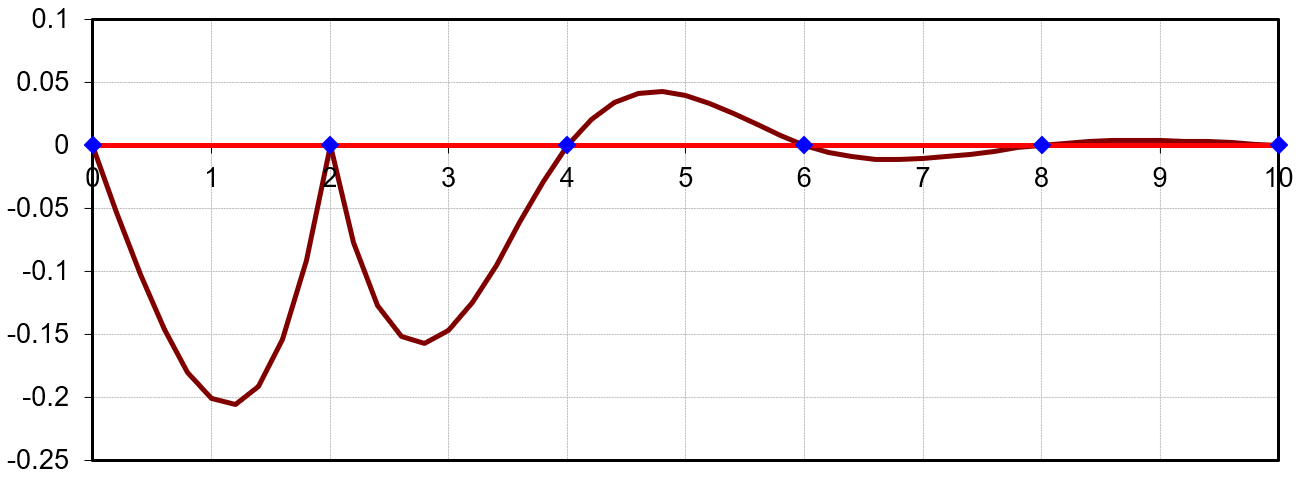

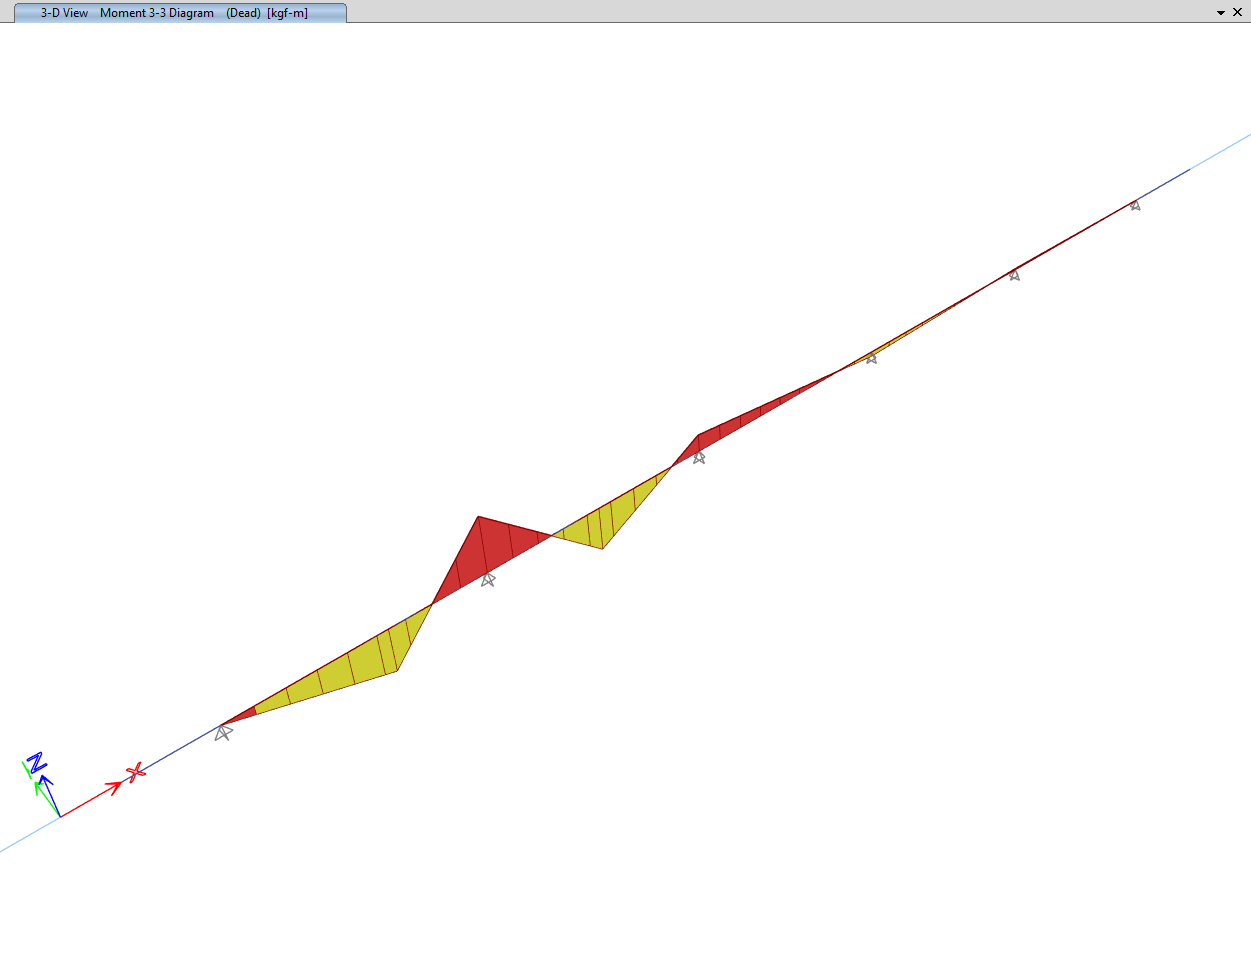

In [55]:
m=1.2 # Factor de Multipresencia ( 2 vehiculos )
M_LL_i_neg_1=-m*2.6/E # 2.6 tnf-m Momento en el Apoyo Interior
print ('M_LL_i_neg_1 = '+str(round(M_LL_i_neg_1,2))+' tnf-m')

M_LL_i_neg_1 = -1.81 tnf-m


_Momento del Apoyo Interior __2___

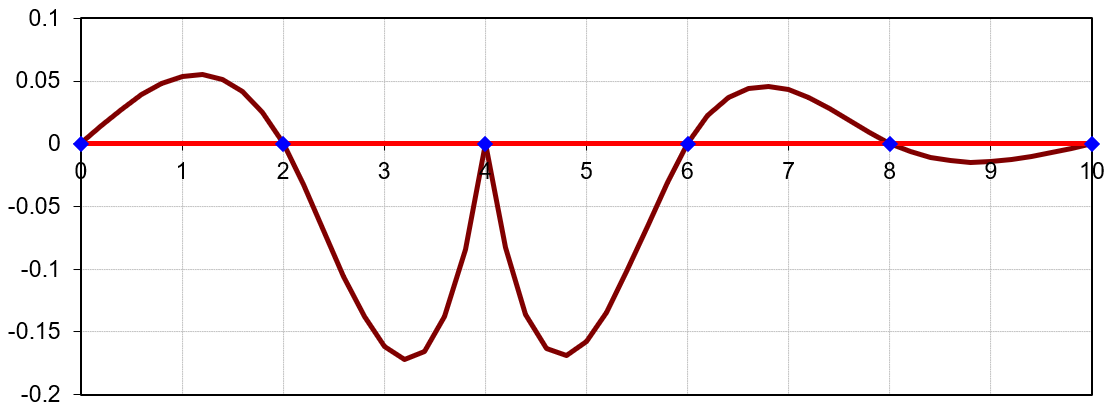

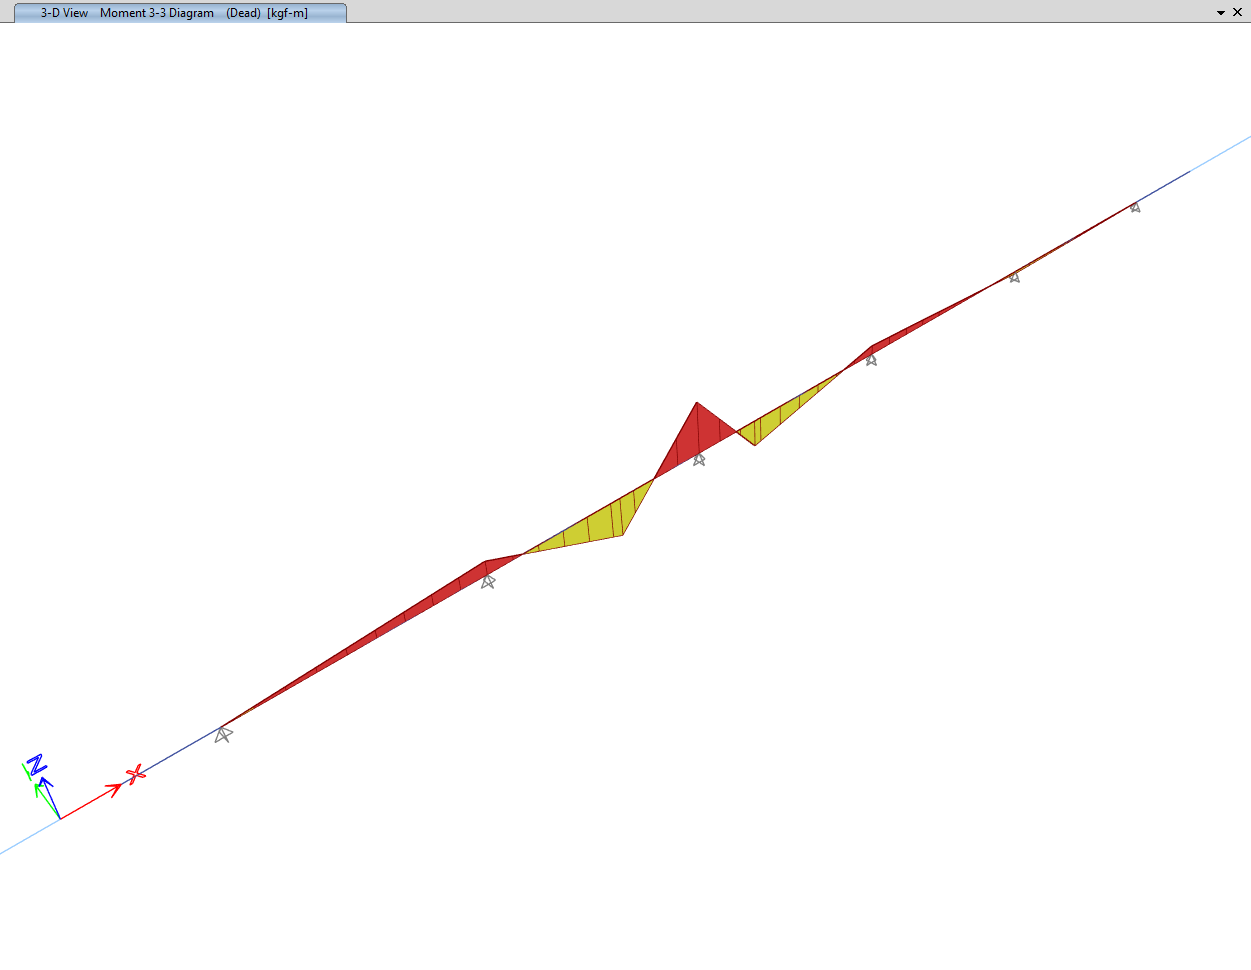

In [56]:
m = 1.2  # Factor de Multipresencia ( 2 vehiculos )
M_LL_i_neg_2 =-m*2.47/E  # 2.6 tnf-m Momento en el Apoyo Interior
print ('M_LL_i_neg_2 = '+str(round(M_LL_i_neg_2, 2))+' tnf-m')

M_LL_i_neg_2 = -1.72 tnf-m


*Momento Positivo Interior __1er Tramo__*

In [57]:
E=0.66+.55*s
print ('E='+str(round(E, 2))+' m')

E=1.76 m


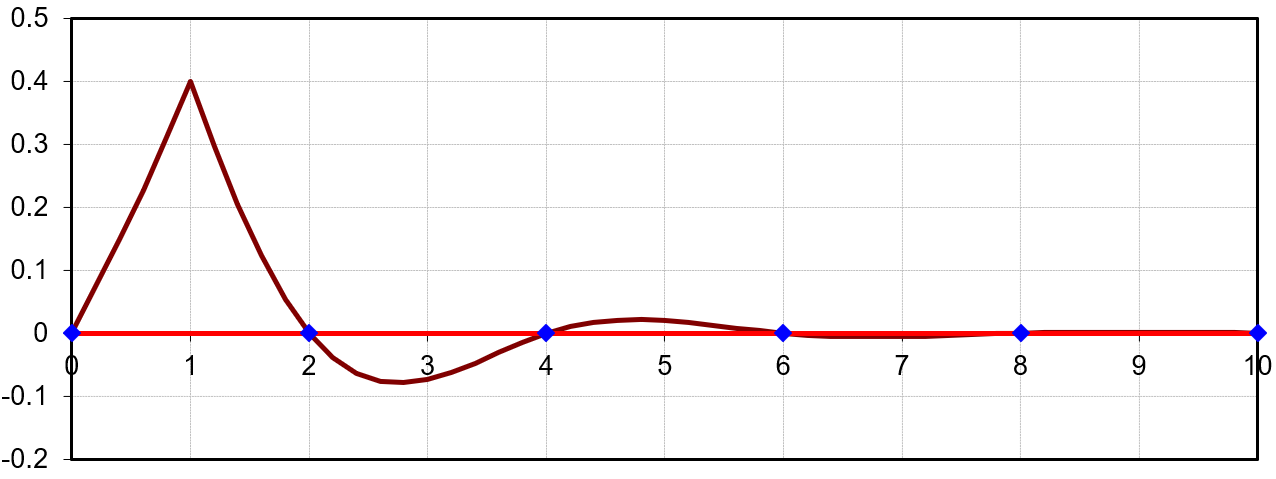

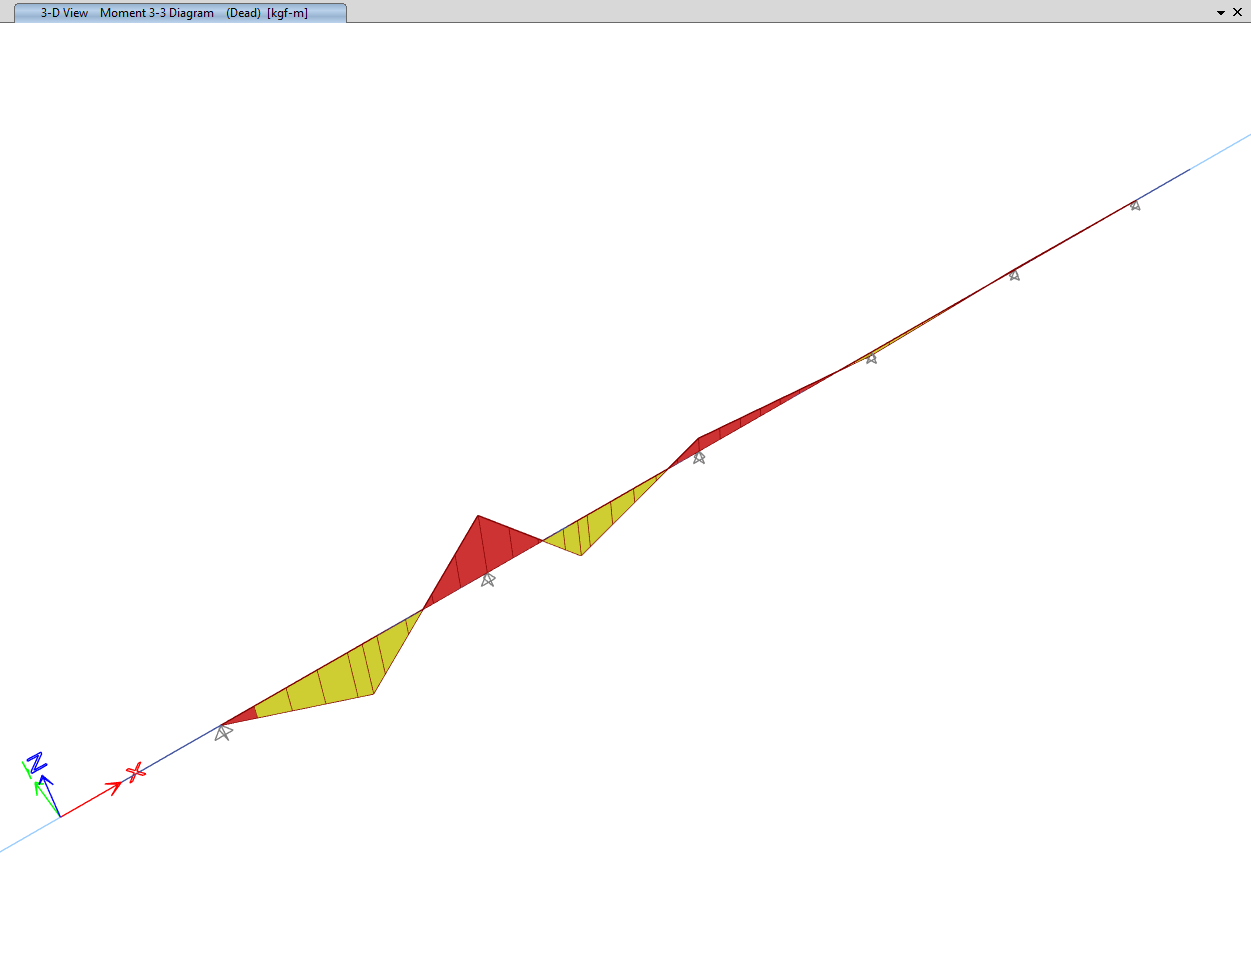

In [58]:
m = 1.2  # Factor de Multipresencia ( 2 vehiculos )
M_LL_i_pos_1 = m*2.38/E  # 2.38 tnf-m Momento en el Apoyo Interior
print ('M_LL_i_pos_1 = '+str(round(M_LL_i_pos_1, 2))+' tnf-m')

M_LL_i_pos_1 = 1.62 tnf-m


*Momento Positivo Interior __2do Tramo__*

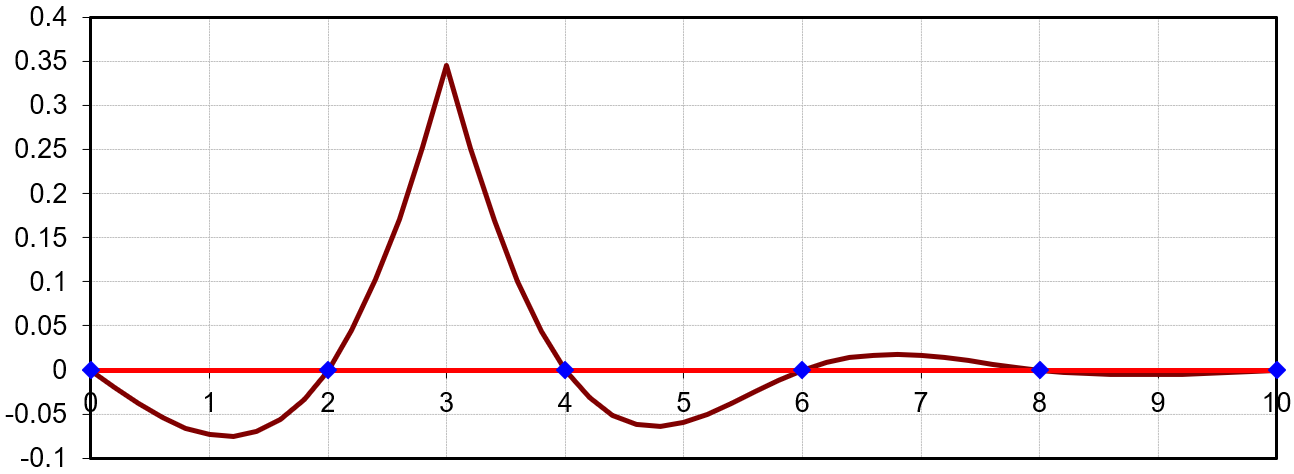

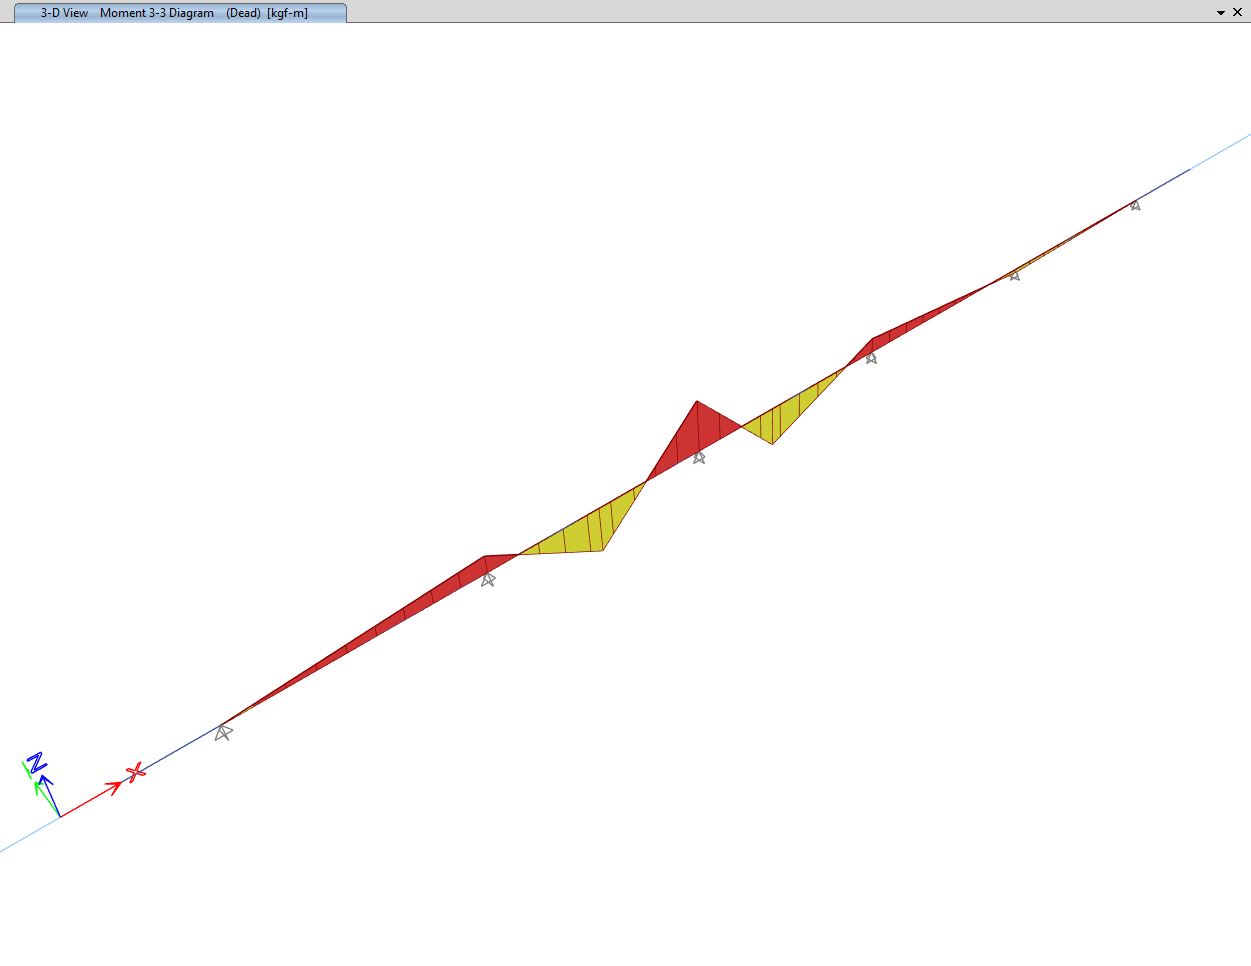

In [59]:
m = 1.2  # Factor de Multipresencia ( 2 vehiculos )
M_LL_i_pos_2 = m*2.09/E  # 2.09 tnf-m Momento en el Apoyo Interior
print('M_LL_i_pos_2 = '+str(round(M_LL_i_pos_2, 2))+' tnf-m')

M_LL_i_pos_2 = 1.42 tnf-m


*Momento Positivo Interior __3er Tramo__*

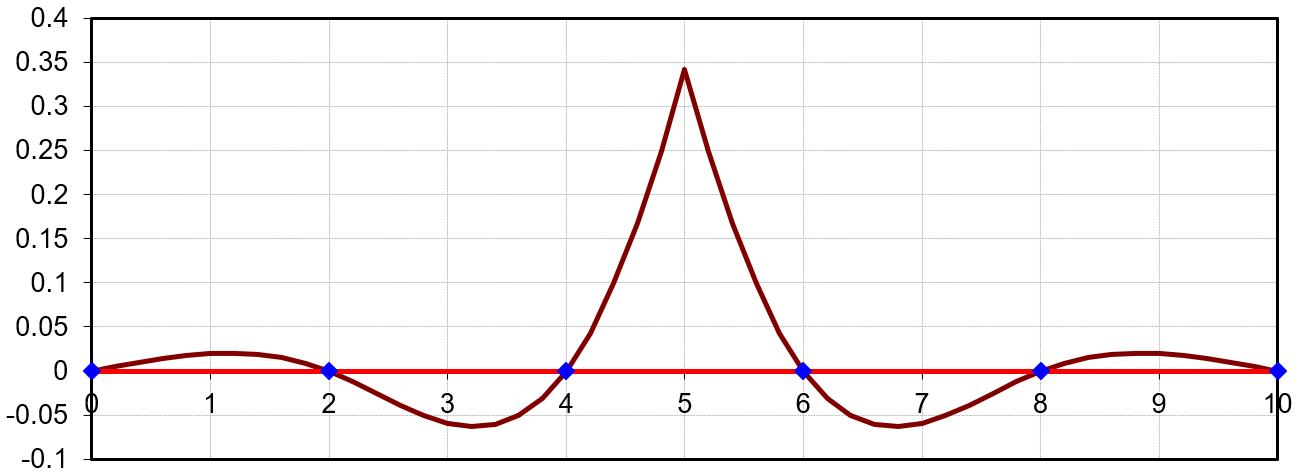

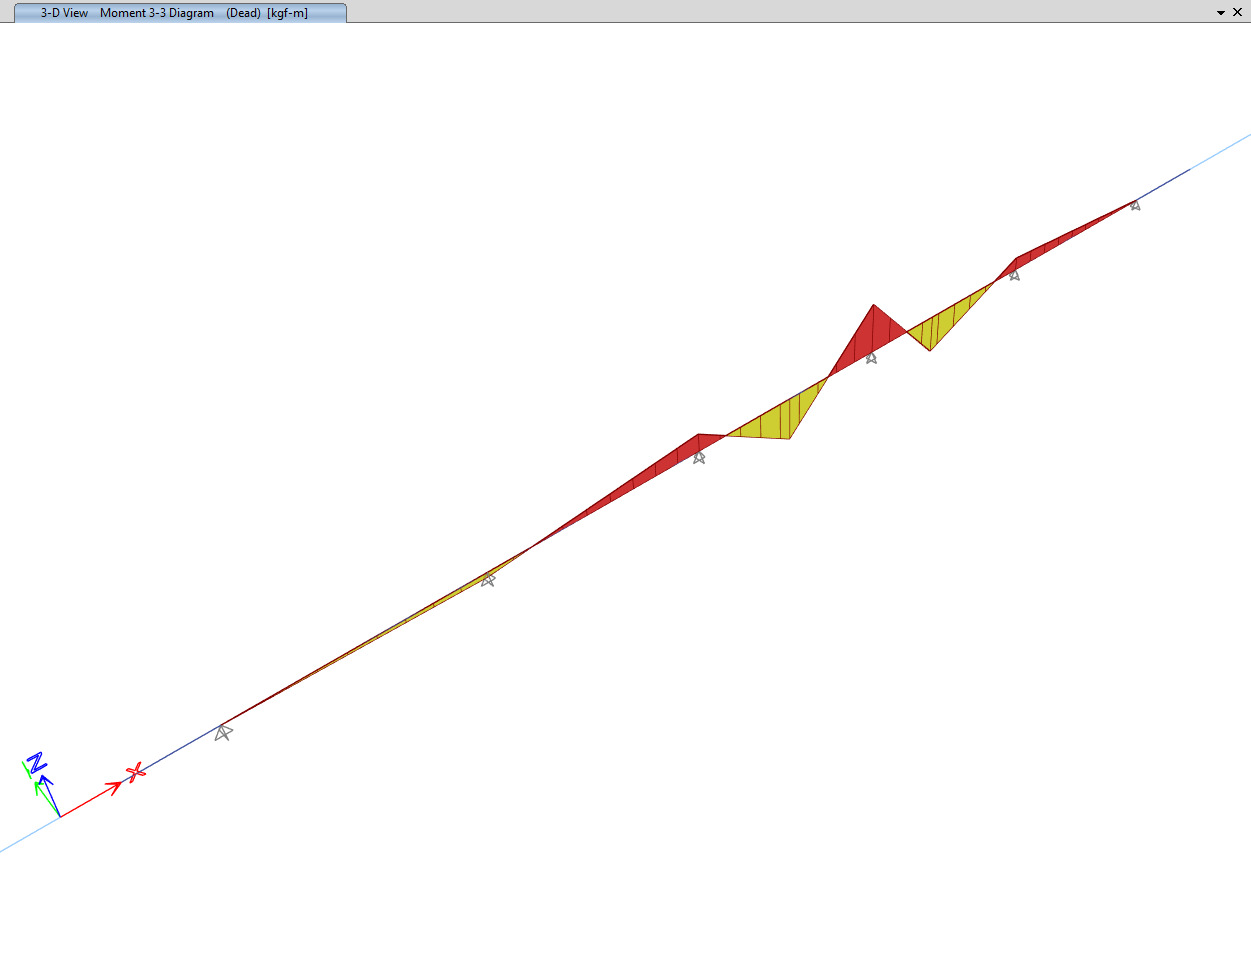

In [60]:
m = 1.2  # Factor de Multipresencia ( 2 vehiculos )
M_LL_i_pos_3 = m*2.07/E  # 2.07 tnf-m Momento en el Apoyo Interior
print('M_LL_i_pos_3 = '+str(round(M_LL_i_pos_3, 2))+' tnf-m')

M_LL_i_pos_3 = 1.41 tnf-m


---

**CONSOLIDADO**

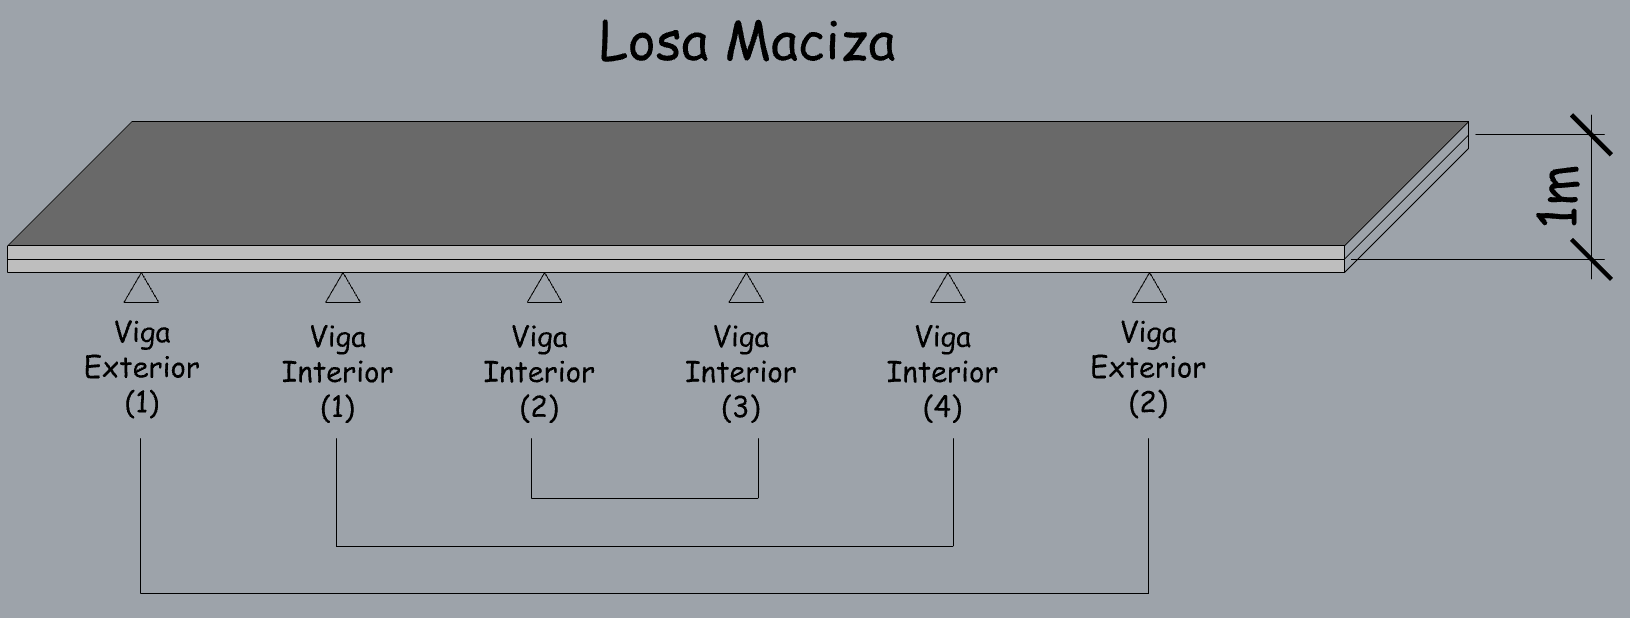

*Formato para el Consolidado:*

- *M_DC*
- *M_DW*
- *M_PL*
- *M_LL*
- *M_IM*

***1er Apoyo***

In [61]:
Data_5=[round(A_1,2),round(A_2,2),round(A_3,2),round(M_sl_e_neg_1,2),round(M_sl_e_neg_1*.33,2)]
Data_5

[-0.25, -1.45, -0.8, -3.15, -1.04]

***Mitad de tramo 1***

In [62]:
Data_6=[round(B_1,2),round(B_2,2),round(B_3,2),round(M_LL_i_pos_1,2),round(M_LL_i_pos_1*.33,2)]
Data_6

[0.06, -0.47, -0.3, 1.62, 0.54]

***2 Apoyo***

In [63]:
Data_7=[round(C_1,2),round(C_2,2),round(C_3,2),round(M_LL_i_neg_1,2),round(M_LL_i_neg_1*.33,2)]
Data_7

[-0.15, 0.28, 0.21, -1.81, -0.6]

***Mitad de tramo 2***

In [64]:
Data_8=[round(D_1,2),round(D_2,2),round(D_3,2),round(M_LL_i_pos_2,2),round(M_LL_i_pos_2*.33,2)]
Data_8

[0.09, 0.18, 0.08, 1.42, 0.47]

***3 Apoyo***

In [65]:
Data_9=[round(E_1,2),round(E_2,2),round(E_3,2),round(M_LL_i_neg_2,2),round(M_LL_i_neg_2*.33,2)]
Data_9

[-0.17, -0.14, -0.04, -1.72, -0.57]

***Mitad de tramo 3***

In [66]:
Data_10=[round(F_1,2),round(F_2,2),round(E_3,2),round(M_LL_i_pos_3,2),round(M_LL_i_pos_3*.33,2)] # E3 se repite porque es constante
Data_10

[0.08, -0.04, -0.04, 1.41, 0.47]

---

**DISEÑO POR FLEXION**

***Apoyo 1***

In [67]:
phi_f=0.9 # Factor de Reduccion por Flexion
d=h*100-15 # Peralte Efectivo (cm) 2 Capas = 15 cm
Mu=1.25*Data_5[0]+1.5*Data_5[1]+1.75*(Data_5[2]+Data_5[3]+Data_5[4]) # Momento Ultimo (tnf-m)
ku=Mu*10**5/(phi_f*(1*100)*d**2) # Factor ku
m=fy/(0.85*fc) # Factor m
rho=1/m*(1-(1-2*m*(ku/fy))**0.5) # Factor rho
if rho < 0.03*fc/fy: # Cuantia de Acero Minimo
    rho=0.03*fc/fy
else:
    rho=rho
As=rho*(1*100)*d # Area de Acero (cm2)
a=As*fy/(0.85*fc*(1*100)) # Valor a (cm)
c=a/0.85 # Valor c (cm)
if c/d < 0.42:
    print('Falla Ductil :: c/d = '+str(round(c/d, 4)) + ' < 0.42')
else:
    print ('Falla Fragil :: c/d = '+str(round(c/d,4)) + ' > 0.42')

Falla Ductil :: c/d = 0.0415 < 0.42


In [68]:
# Calculo de Acero :: Parte Superior

n = 11  # Cantidad de Barras de Acero
diam_1 = 1  # Diametro de la Barra (in)
As_esc_1 = n*pi*(diam_1*2.54)**2/4  # Area de la Barra (cm2)
print('Area As (cm2) = '+str(round(As, 2)) + ' cm2 '+' (Requerido)')
print ('Area As (cm2) = '+str(round(As_esc_1, 2)) + ' cm2 '+':: '+str(n) + '#'+str(diam_1)+' (Escogido)')

Area As (cm2) = 52.86 cm2  (Requerido)
Area As (cm2) = 55.74 cm2 :: 11#1 (Escogido)


***Mitad del tramo 1***

In [69]:
phi_f=0.9 # Factor de Reduccion por Flexion
d=h*100-15 # Peralte Efectivo (cm) 2 Capas = 15 cm

Mu=1.25*Data_6[0]+1.5*Data_6[1]+1.75*(Data_6[2]+Data_6[3]+Data_6[4]) # Momento Ultimo (tnf-m)
ku=Mu*10**5/(phi_f*(1*100)*d**2) # Factor ku :: Ancho 1m
m=fy/(0.85*fc)
rho = 1/m*(1-(1-2*m*(ku/fy))**0.5)
if rho < 0.03*fc/fy: # Cuantia de Acero Minimo
    rho=0.03*fc/fy
else:
    rho=rho
As = rho*(1*100)*d  # Ancho 1m
a = As*fy/(0.85*fc*(1*100))  # Ancho 1m
c = a/0.85

if c/d < 0.42:
    print('Falla Ductil :: c/d = ' + str(round(c/d, 2)) + ' < 0.42')
else:
    print('Falla Fragil :: c/d = ' + str(round(c/d, 2)) + ' > 0.42')

Falla Ductil :: c/d = 0.04 < 0.42


In [70]:
# Calculo de Acero :: Parte Inferior

n = 11  # Cantidad de Barras de Acero
diam_1 = 1  # Diametro de la Barra (in)
As_esc_1 = n*pi*(diam_1*2.54)**2/4  # Area de la Barra (cm2)
print('Area As (cm2) = '+str(round(As, 2)) + ' cm2 '+' (Requerido)')
print ('Area As (cm2) = '+str(round(As_esc_1,2)) + ' cm2 '+':: '+str(n) + '#'+str(diam_1)+' (Escogido)')

Area As (cm2) = 52.86 cm2  (Requerido)
Area As (cm2) = 55.74 cm2 :: 11#1 (Escogido)


***Apoyo 2***

In [71]:
phi_f = 0.9  # Factor de Reduccion por Flexion
d = h*100-15  # Peralte Efectivo (cm) 2 Capas = 15 cm
Mu = 1.25*Data_7[0]+1.5*Data_7[1]+1.75 * (Data_7[2]+Data_7[3]+Data_7[4])  # Momento Ultimo (tnf-m)
ku = Mu*10**5/(phi_f*(1*100)*d**2)  # Factor ku
m = fy/(0.85*fc)  # Factor m
rho = 1/m*(1-(1-2*m*(ku/fy))**0.5)  # Factor rho
if rho < 0.03*fc/fy:  # Cuantia de Acero Minimo
    rho = 0.03*fc/fy
else:
    rho = rho
As = rho*(1*100)*d  # Area de Acero (cm2)
a = As*fy/(0.85*fc*(1*100))  # Valor a (cm)
c = a/0.85  # Valor c (cm)
if c/d < 0.42:
    print('Falla Ductil :: c/d = '+str(round(c/d, 2)) + ' < 0.42')
else:
    print('Falla Fragil :: c/d = '+str(round(c/d, 2)) + ' > 0.42')

Falla Ductil :: c/d = 0.04 < 0.42


In [72]:
# Calculo de Acero :: Parte Superior

n = 11  # Cantidad de Barras de Acero
diam_1 = 1  # Diametro de la Barra (in)
As_esc_1 = n*pi*(diam_1*2.54)**2/4  # Area de la Barra (cm2)
print('Area As (cm2) = '+str(round(As, 2)) + ' cm2 '+' (Requerido)')
print('Area As (cm2) = '+str(round(As_esc_1, 2)) +' cm2 '+':: '+str(n) + '#'+str(diam_1)+' (Escogido)')

Area As (cm2) = 52.86 cm2  (Requerido)
Area As (cm2) = 55.74 cm2 :: 11#1 (Escogido)


***Mitad del tramo 2***

In [73]:
phi_f=0.9 # Factor de Reduccion por Flexion
d=h*100-15 # Peralte Efectivo (cm) 2 Capas = 15 cm

Mu=1.25*Data_8[0]+1.5*Data_8[1]+1.75*(Data_8[2]+Data_8[3]+Data_8[4]) # Momento Ultimo (tnf-m)
ku=Mu*10**5/(phi_f*(1*100)*d**2) # Factor ku :: Ancho 1m
m=fy/(0.85*fc)
rho = 1/m*(1-(1-2*m*(ku/fy))**0.5)
if rho < 0.03*fc/fy: # Cuantia de Acero Minimo
    rho=0.03*fc/fy
else:
    rho=rho
As = rho*(1*100)*d  # Ancho 1m
a = As*fy/(0.85*fc*(1*100))  # Ancho 1m
c = a/0.85

if c/d < 0.42:
    print('Falla Ductil :: c/d = ' + str(round(c/d, 2)) + ' < 0.42')
else:
    print('Falla Fragil :: c/d = ' + str(round(c/d, 2)) + ' > 0.42')

Falla Ductil :: c/d = 0.04 < 0.42


In [74]:
# Calculo de Acero :: Parte Inferior

n = 11  # Cantidad de Barras de Acero
diam_2 = 1  # Diametro de la Barra (in)
As_esc_2 = n*pi*(diam_2*2.54)**2/4  # Area de la Barra (cm2)
print('Area As (cm2) = '+str(round(As, 2)) + ' cm2 '+' (Requerido)')
print ('Area As (cm2) = '+str(round(As_esc_2, 2)) + ' cm2 '+':: '+str(n) + '#'+str(diam_2)+' (Escogido)')

Area As (cm2) = 52.86 cm2  (Requerido)
Area As (cm2) = 55.74 cm2 :: 11#1 (Escogido)


In [75]:
phi_f = 0.9  # Factor de Reduccion por Flexion
d = h*100-15  # Peralte Efectivo (cm) 2 Capas = 15 cm
Mu = 1.25*Data_9[0]+1.5*Data_9[1]+1.75 * (Data_9[2]+Data_9[3]+Data_9[4])  # Momento Ultimo (tnf-m)
ku = Mu*10**5/(phi_f*(1*100)*d**2)  # Factor ku
m = fy/(0.85*fc)  # Factor m
rho = 1/m*(1-(1-2*m*(ku/fy))**0.5)  # Factor rho
if rho < 0.03*fc/fy:  # Cuantia de Acero Minimo
    rho = 0.03*fc/fy
else:
    rho = rho
As = rho*(1*100)*d  # Area de Acero (cm2)
a = As*fy/(0.85*fc*(1*100))  # Valor a (cm)
c = a/0.85  # Valor c (cm)
if c/d < 0.42:
    print('Falla Ductil :: c/d = '+str(round(c/d, 2)) + ' < 0.42')
else:
    print('Falla Fragil :: c/d = '+str(round(c/d, 2)) + ' > 0.42')

Falla Ductil :: c/d = 0.04 < 0.42


In [76]:
# Calculo de Acero :: Parte Superior

n = 11  # Cantidad de Barras de Acero
diam_1 = 1  # Diametro de la Barra (in)
As_esc_1 = n*pi*(diam_1*2.54)**2/4  # Area de la Barra (cm2)
print('Area As (cm2) = '+str(round(As, 2)) + ' cm2 '+' (Requerido)')
print('Area As (cm2) = '+str(round(As_esc_1, 2)) + ' cm2 '+':: '+str(n) + '#'+str(diam_1)+' (Escogido)')

Area As (cm2) = 52.86 cm2  (Requerido)
Area As (cm2) = 55.74 cm2 :: 11#1 (Escogido)


***Mitad del tramo 3***

In [77]:
phi_f=0.9 # Factor de Reduccion por Flexion
d=h*100-15 # Peralte Efectivo (cm) 2 Capas = 15 cm

Mu=1.25*Data_10[0]+1.5*Data_10[1]+1.75*(Data_10[2]+Data_10[3]+Data_10[4]) # Momento Ultimo (tnf-m)
ku=Mu*10**5/(phi_f*(1*100)*d**2) # Factor ku :: Ancho 1m
m=fy/(0.85*fc)
rho = 1/m*(1-(1-2*m*(ku/fy))**0.5)
if rho < 0.03*fc/fy: # Cuantia de Acero Minimo
    rho=0.03*fc/fy
else:
    rho=rho
As = rho*(1*100)*d  # Ancho 1m
a = As*fy/(0.85*fc*(1*100))  # Ancho 1m
c = a/0.85

if c/d < 0.42:
    print('Falla Ductil :: c/d = ' + str(round(c/d, 2)) + ' < 0.42')
else:
    print('Falla Fragil :: c/d = ' + str(round(c/d, 2)) + ' > 0.42')

Falla Ductil :: c/d = 0.04 < 0.42


In [78]:
# Calculo de Acero :: Parte Inferior

n = 11 # Cantidad de Barras de Acero
diam_3 = 1  # Diametro de la Barra (in)
As_esc_3 = n*pi*(diam_3*2.54)**2/4  # Area de la Barra (cm2)
print('Area As (cm2) = '+str(round(As, 2)) + ' cm2 '+' (Requerido)')
print ('Area As (cm2) = '+str(round(As_esc_3, 2)) + ' cm2 '+':: '+str(n) + '#'+str(diam_3)+' (Escogido)')

Area As (cm2) = 52.86 cm2  (Requerido)
Area As (cm2) = 55.74 cm2 :: 11#1 (Escogido)


---

**ACERO DE DISTRIBUCION (PARALELO AL TRAFICO)**

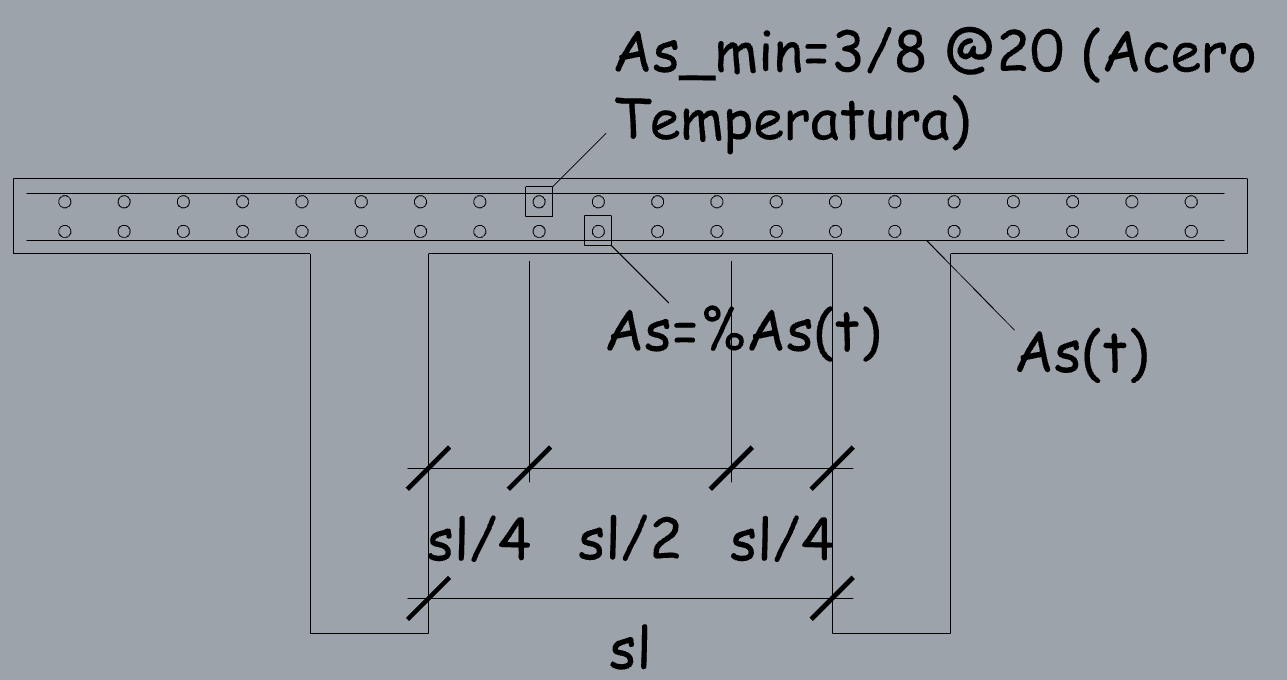

In [79]:
prc_As_fc=121/sl**.5 # Porcentaje de Acero paralelo al Trafico (Franja Central)
if prc_As_fc > 67:
    prc_As_fc=67
    print('prc_As_fc = '+str(round(prc_As_fc, 2))+' [%]')
else:
    print('prc_As_fc = '+str(round(prc_As_fc, 2))+' [%]')
prc_As_fb=.5*prc_As_fc # Porcentaje de Acero paralelo al Trafico (Franja Borde) :: Reducimos en un 50% el acero de la franja central
print ('prc_As_fb = '+str(round(prc_As_fb, 2))+' [%]')

prc_As_fc = 67 [%]
prc_As_fb = 33.5 [%]


***Mitad del Tramo 1***

In [80]:
As_fc_1=prc_As_fc/100*As_esc_1
print ('As_fc_1 = '+str(round(As_fc_1, 2))+' cm2 '+':: '+str(round(As_fc_1/As_esc_1, 2))+'%'+' #'+str(diam_1))
As_fb_1=prc_As_fb/100*As_esc_1
print ('As_fb_1 = '+str(round(As_fb_1, 2))+' cm2 '+':: '+str(round(As_fb_1/As_esc_1, 2))+'%'+' #'+str(diam_1))

As_fc_1 = 37.34 cm2 :: 0.67% #1
As_fb_1 = 18.67 cm2 :: 0.34% #1


***Mitad del Tramo 2***

In [81]:
As_fc_2=prc_As_fc/100*As_esc_2
print ('As_fc_2 = '+str(round(As_fc_2, 2))+' cm2 '+':: '+str(round(As_fc_2/As_esc_2, 2))+'%'+' #'+str(diam_2))
As_fb_2=prc_As_fb/100*As_esc_2
print ('As_fb_2 = '+str(round(As_fb_2, 2))+' cm2 '+':: '+str(round(As_fb_2/As_esc_2, 2))+'%'+' #'+str(diam_2))

As_fc_2 = 37.34 cm2 :: 0.67% #1
As_fb_2 = 18.67 cm2 :: 0.34% #1


***Mitad del Tramo 3***

In [82]:
As_fc_3=prc_As_fc/100*As_esc_3
print ('As_fc_3 = '+str(round(As_fc_3, 2))+' cm2 '+':: '+str(round(As_fc_3/As_esc_3, 2))+'%'+' #'+str(diam_3))
As_fb_3=prc_As_fb/100*As_esc_3
print ('As_fb_3 = '+str(round(As_fb_3, 2))+' cm2 '+':: '+str(round(As_fb_3/As_esc_3, 2))+'%'+' #'+str(diam_3))

As_fc_3 = 37.34 cm2 :: 0.67% #1
As_fb_3 = 18.67 cm2 :: 0.34% #1


---

**ACERO DE TEMPERATURA (PARALELO AL TRAFICO)**

In [83]:
b=100 # Ancho de la Losa (cm)
Ag=b*(ts*100) # Area Bruta (cm2)
As_tmp=.756/(fy/10)*Ag
print ('As_tmp = '+str(round(As_tmp, 2))+' cm2 ')
# En 2 Capas
n=2 # Numero de Capas
As_tmp=As_tmp/n
print ('As_tmp = '+str(round(As_tmp, 2))+' cm2 '+':: '+'('+str(n)+' Capas)')

As_tmp = 3.6 cm2 
As_tmp = 1.8 cm2 :: (2 Capas)


In [84]:
diam=3/8 # Diametro de la Barra (in)
As_esc=pi*(diam*2.54)**2/4 # Area de la Barra (cm2)
s=100*As_esc/As_tmp
print ('s = '+str(round(s, 2))+' cm '+':: '+'# '+str(diam))

s = 39.59 cm :: # 0.375


***Norma Colombiana***

In [85]:
s_nc=100*As_esc/3 # Segun la Norma Colmbiana en 1m deberia entrar 3cm2 de Acero
print ('s_nc = '+str(round(s_nc, 2))+' cm '+':: '+'# '+str(diam))
print ('Escoger un espaciamiento s ...')

s_nc = 23.75 cm :: # 0.375
Escoger un espaciamiento s ...


In [86]:
s=20 # cm

---

**CONTRAFLECHA**

***Viga Interior***

In [87]:
# DC
w_dc_cf=dc*(be_i*ts+bw*(h-ts)) # Carga Distribuida Estructural (tnf/m)
M_dc_cf=w_dc_cf*lz**2/8 # Momento Flector (tnf-m)
# DW
w_dw_cf=da*.1*be_i # Carga Distribuida No Estructural (tnf/m)
M_dw_cf=w_dw_cf*lz**2/8 # Momento Flector (tnf-m)
w_cf_vi=sum([w_dc_cf, w_dw_cf]) # Carga Distribuida Total (tnf/m)
print ('w_cf_vi = '+str(round(w_cf_vi, 2))+' tnf/m')
Ma = M_dc_ve+M_dw_ve  # Momento Flector (tnf-m)
print ('Ma = '+str(round(Ma, 2))+' tnf-m')

w_cf_vi = 3.69 tnf/m
Ma = 457.3 tnf-m


*Inercia de la Seccion Fisurada*

In [88]:
Ig=I # Momento de Inercia de la Seccion (cm4)
yg=cg # Distancia del eje neutro al eje de la viga (cm)
print ('Ig = '+str(round(Ig, 2))+' cm4')
print ('yg = '+str(round(yg, 2))+' m')

Ig = 0.52 cm4
yg = 1.21 m


In [89]:
n=Ea/Ec # Relacion de Modulos de Elasticidad
As=As_esc_vi # Area de Acero (cm2)
x=symbols('x') # Variable x
solve(Eq((be_i*100)*x**2/2+n*As*d,((be_i*100)*x+n*As)*x),x) # Escogemos el valor de x

[-45.8899312511923, 36.7691966274373]

In [90]:
x=36.77 # cm

In [91]:
Icr=be_i*(x/100)**3/12+be_i*(x/100)**3/2+n*(As*10**(-4))*((d-x)/100)**2 # Momento de Inercia Crítico (cm4)
print ('Icr = '+str(round(Icr, 4))+' m4')

Icr = 0.2584 m4


*Momento para la 1ra Fisura*

In [92]:
Mcr=(Et*10)*Ig/yg # Momento Flector Critico (tnf-m)
print ('Mcr = '+str(round(Mcr, 2))+' tnf-m')

Mcr = 172.65 tnf-m


In [93]:
Ie=(Mcr/Ma)**3*Ig+(1-(Mcr/Ma)**3)*Icr # Momento de Inercia Efectivo (cm4)
print ('Ie = '+str(round(Ie, 2))+' m4 '+'<'+' Ig = '+str(round(Ig, 2))+' m4 '+'(Inercia Bruta)')

Ie = 0.27 m4 < Ig = 0.52 m4 (Inercia Bruta)


*Calculo de Deflexion Instantanea*

In [94]:
defl_ins=5*w_cf_vi*lz**4/(384*(Ec*10)*Ie) # Deformacion Instantanea (cm)
print ('defl_ins = '+str(round(defl_ins, 2))+' m')

defl_ins = 0.04 m


*Deflexion en el Tiempo*

In [95]:
As_sup=As_sup_vi
As_inf=As_esc_vi
defl_tiempo=defl_ins*(3-1.2*As_sup/As_inf)
print ('defl_tiempo = '+str(round(defl_tiempo, 2))+' m')

defl_tiempo = 0.11 m
